In [6]:
import sys
sys.path.append(str('/home/jupyter/'))
import pandas as pd
from configparser import ConfigParser
from repo.MyConfigParser import MyConfigParser
from repo.Optimization import SavantPSO
import numpy as np

# Read In

In [7]:
updated_config = ConfigParser()
config_in_path = "/home/jupyter/FR/Jun 2024/config ups fr.ini"
updated_config.read(config_in_path)

getdict = MyConfigParser()
config_dict=getdict.GetDict(updated_config)
region = config_dict['CLIENTINFO']['country']
cutoff_month = config_dict['PROPHETSETTING']['cut_off_point']
base_start = config_dict['PROPHETSETTING']['reference_start_date1']
base_end = config_dict['PROPHETSETTING']['reference_end_date1']
periods = config_dict['PROPHETSETTING']['periods']
base_periods  = config_dict['PROPHETSETTING']['base_periods']

output_bucket = config_dict["FILEPATH"]["output_bucket"]
folder_name = config_dict["FILEPATH"]["folder_name"]

base_path = config_dict["FILEPATH"]["base_path"]

boundary_df_in_path = base_path + config_dict["FILEPATH"]["boundary_df_in_path"]
daily_df_out_path = base_path + config_dict["FILEPATH"]["daily_df_out_path"]
analytical_file_path = base_path + config_dict["FILEPATH"]["analytical_file_path"]
cuts_df_in_path = base_path + config_dict["FILEPATH"]["cuts_df_in_path"]
plot_name = base_path + config_dict["FILEPATH"]["plot_name"]
constraint_file_name = base_path + config_dict["FILEPATH"]["constraint_file_name"]
breakdown_ls = [config_dict['CLIENTINFO'][i] for i in [f'breakdown{i}' for i in range(1,5)] if config_dict['CLIENTINFO'][i] != None]

small_market_str = ''
pre_forecast_period_budget = float(config_dict['CLIENTINFO']['pre_forecast_period_budget'])
client_budget = float(config_dict['CLIENTINFO']['client_budget'])

save_date = config_dict['CLIENTINFO']['save_date']

In [8]:
# Get forecasters
bdDf = pd.read_csv(cuts_df_in_path)#.drop('Unnamed: 0', axis = 1)
cuts_df = bdDf.reset_index(drop = True)
cuts_df['forecaster_name_list'] =  cuts_df['market'] + ' ' + cuts_df['account_type'] + ' ' + cuts_df['funnel'] + '.pkl' #' 05.19.2021 Final.pkl'
cuts_df['periods'] = periods
# get model list
forecasters_array = cuts_df.forecaster_name_list

# Get analytical file
analytical_file = pd.read_csv(analytical_file_path).drop('Unnamed: 0', axis = 1)
analytical_file['ds'] = pd.to_datetime(analytical_file['ds'])
analytical_file_check_version = analytical_file.copy()

# Get constrain file
constraint_file = pd.read_csv(constraint_file_name)
constraint_file['init'] = constraint_file[['MinWeight', 'MaxWeight']].mean(axis = 1)

In [9]:
cuts_df

,market,account_type,funnel,periods_for_acc_cal,changepoint_prior_scale,seasonality_prior_scale,holidays_prior_scale,seasonality_mode,input_mode,weekday_or_weekend,...,anomaly_2021,generic_cost_split,competitor_cost_split,new_confirmed,power,growth,MAPE,period_AE,forecaster_name_list,periods
0,France,Desktop,-,183,0.05,10.0,0.01,additive,additive,additive,...,na,na,na,na,na,linear,12.37,10.17,France Desktop -.pkl,251.0
1,France,Mobile & Tablet,-,183,0.05,10.0,10.00,additive,multiplicative,additive,...,na,na,na,na,na,logistic,5.14,0.59,France Mobile & Tablet -.pkl,251.0


# Functions

In [10]:
resultPSO = SavantPSO(cuts_df, analytical_file, constraint_file, config_dict)

In [11]:
itNum = 150
options = {'c1': 0.20255337412386598,
 'c2': 0.034812002156869526,
 'w': 0.8707709059066462}
result = resultPSO.run_pso(options, itNum = itNum)

2024-05-30 06:41:59,603 - pyswarms.single.global_best - INFO - Optimize for 150 iters with {'c1': 0.20255337412386598, 'c2': 0.034812002156869526, 'w': 0.8707709059066462}


/home/jupyter/FR/Jun 2024/Input Weight History 05.30.2024.csv


pyswarms.single.global_best:   0%|          |0/150

[1.   1.   1.   1.   1.   1.   1.   0.75 1.   1.   1.   1.   1.   1.
 1.   1.   0.75 1.  ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98371.0
client_budget - analytical_spend_latest_period: 0
[1.   1.   1.   1.   1.   1.   1.   0.75 1.   1.   1.   1.   1.   1.
 1.   1.   0.75 1.  ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98371.0
client_budget - analytical_spend_latest_period: 0
[1.   1.   1.   1.   1.   1.   1.   0.75 1.   1.   1.   1.   1.   1.
 1.   1.   0.75 1.  ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 dif

pyswarms.single.global_best:   1%|          |1/150, best_cost=-98371.0

yhat: -98371.0
client_budget - analytical_spend_latest_period: 0
[0.80314793 1.02543916 1.04998755 0.8233535  0.95803664 0.83812738
 0.9610658  0.7565107  1.15555267 1.08113864 1.03597124 0.96123453
 1.06606467 0.97526038 1.06775542 1.07912934 0.78996087 0.99079774]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98308.0
client_budget - analytical_spend_latest_period: 0
[1.01777555 0.82345144 0.99421925 0.84783386 1.03438827 1.18817372
 0.8881329  0.75508693 0.90032175 1.03847521 0.93342107 1.04240369
 1.16326616 1.15060889 0.86713237 0.99159614 0.79848335 1.05132183]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is:

pyswarms.single.global_best:   1%|▏         |2/150, best_cost=-98439.0

yhat: -98340.0
client_budget - analytical_spend_latest_period: 0
[0.94207631 0.99805901 1.03261231 1.04641887 0.87072114 1.06293438
 0.88008719 0.78423758 0.87791512 1.09027429 0.95975062 0.8288168
 1.00924215 0.90335973 1.12056556 1.13670621 0.7928183  0.93113364]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98387.0
client_budget - analytical_spend_latest_period: 0
[0.92987171 1.05925261 0.93729972 1.03571055 0.96172777 0.94311884
 1.10928165 0.74641464 1.13256786 1.06949724 1.17105422 0.9689668
 0.8855999  0.86538346 1.13126839 0.93397365 0.71937936 1.08624976]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 10

pyswarms.single.global_best:   2%|▏         |3/150, best_cost=-98439.0

yhat: -98394.0
client_budget - analytical_spend_latest_period: 0
[1.01546708 0.92316653 0.9621056  0.84102833 1.14983533 0.85914402
 1.15824719 0.74381099 0.98605807 1.04932534 1.18692944 1.01279276
 0.8547894  1.18847721 1.16465286 1.18469383 0.76765727 0.82632674]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.13999999998
yhat: -98307.0
client_budget - analytical_spend_latest_period: 0
[1.16294826 0.86236693 0.84680564 1.14069398 0.80728498 1.07869069
 0.83288578 0.72668454 0.87032507 1.09043008 0.89332645 0.80379352
 0.99964299 0.98998674 0.9566306  0.83752373 0.72474443 1.11441197]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period 

pyswarms.single.global_best:   3%|▎         |4/150, best_cost=-98445.0

yhat: -98313.0
client_budget - analytical_spend_latest_period: 0
[1.01192135 0.82351751 0.85346307 1.02069247 0.95264938 1.05121362
 0.96122131 0.74683181 1.07492271 0.97034745 0.89908156 1.09547714
 1.03158435 1.0340677  1.19241874 0.81693049 0.72133141 1.09051932]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 104114.13999999998
yhat: -98322.0
client_budget - analytical_spend_latest_period: 0
[0.87897168 1.06509829 1.1438425  1.15682532 0.98565319 1.18886308
 0.91429508 0.70025031 0.95822411 1.10236066 0.96894424 0.96709498
 1.09577907 1.10227712 1.15096452 1.11454674 0.71986811 1.12018866]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period 

pyswarms.single.global_best:   3%|▎         |5/150, best_cost=-98445.0

yhat: -98401.0
client_budget - analytical_spend_latest_period: 0
[0.94158218 1.10021436 1.1151937  1.18577015 1.12010516 0.81825187
 1.1322983  0.70110942 1.13703593 0.85714249 0.95675528 1.07357963
 1.12578756 0.82986806 1.19410205 0.86551047 0.75978004 0.89074475]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.13999999998
yhat: -98438.0
client_budget - analytical_spend_latest_period: 0
[0.92668627 0.84381665 1.00193751 1.12045433 1.08879294 0.88348624
 0.93314904 0.76439381 0.98246961 1.11194944 0.9831396  1.05748527
 1.17734537 1.19924674 0.9133715  0.94980301 0.70405724 1.11814641]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:   4%|▍         |6/150, best_cost=-98445.0

yhat: -98389.0
client_budget - analytical_spend_latest_period: 0
[0.82582807 0.94282209 0.9424949  0.92959702 0.86369944 0.96495582
 0.87155805 0.70981588 1.18216683 1.10806324 0.95968269 0.99851908
 1.15567432 1.00491019 1.19235044 0.90868878 0.78065559 1.06570631]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98275.0
client_budget - analytical_spend_latest_period: 0
[0.91304217 1.03633761 0.85630244 1.04356988 1.11555737 1.01154982
 0.89468919 0.70956426 0.94932255 1.11787692 0.9420702  1.07449645
 0.84384    0.86798656 1.09187982 1.15573414 0.78025681 1.10998224]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is:

pyswarms.single.global_best:   5%|▍         |7/150, best_cost=-98449.0

yhat: -98368.0
client_budget - analytical_spend_latest_period: 0
[1.09172072 1.15675739 1.15211843 1.1055972  1.04283874 1.07705349
 1.01324863 0.77762444 0.81361834 0.87778827 0.91454423 0.88201734
 1.12350635 1.12870873 1.18909474 0.94344607 0.78136893 1.19152815]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.13999999998
yhat: -98417.0
client_budget - analytical_spend_latest_period: 0
[0.85135079 0.80886727 1.09559592 0.94680735 1.06919873 1.15886684
 0.81085898 0.74772755 0.87383133 1.11967638 0.86052541 1.02740172
 0.91226006 0.94246241 0.85010335 0.93144124 0.73461938 1.09933113]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:   5%|▌         |8/150, best_cost=-98449.0

yhat: -98362.0
client_budget - analytical_spend_latest_period: 0
[0.91979243 0.93859197 0.92729003 0.86614036 0.80205188 1.1318625
 1.14779937 0.70225896 0.86299772 1.02361807 0.83709493 1.15773852
 1.04371866 0.8278675  1.18539687 0.96811433 0.76629719 0.89043028]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.13999999998
yhat: -98347.0
client_budget - analytical_spend_latest_period: 0
[1.1514895  0.97159298 0.90530339 0.81393508 0.9781897  0.88719958
 1.09143975 0.78078968 1.16187686 1.12087718 1.14099856 0.93100794
 0.97352892 1.00891837 0.99673092 1.08386947 0.78129569 1.08847944]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period sp

pyswarms.single.global_best:   6%|▌         |9/150, best_cost=-98459.0

yhat: -98373.0
client_budget - analytical_spend_latest_period: 0
[1.12404841 1.13096898 1.10393533 1.02400252 0.95884979 1.16393527
 0.86379793 0.79797683 0.9384549  1.1417926  1.1389806  0.97953525
 0.92797603 0.9217612  1.18110007 0.97253215 0.73960871 0.97684704]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98410.0
client_budget - analytical_spend_latest_period: 0
[0.99560809 1.10530965 1.09904865 1.07131694 0.85650569 1.01703649
 0.88428555 0.70770425 0.97908096 1.11683177 0.93573639 1.1959962
 1.0206585  1.05688924 1.0997474  0.80326216 0.72141193 1.07793387]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:   7%|▋         |10/150, best_cost=-98479.0

yhat: -98298.0
client_budget - analytical_spend_latest_period: 0
[0.87768699 0.8951795  0.85853561 1.17240257 1.10312125 1.17188104
 1.00434269 0.75793646 1.04010693 0.82931396 0.98863807 1.18295366
 0.81268087 0.99297917 1.17839824 0.97473852 0.70522361 1.04804018]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98370.0
client_budget - analytical_spend_latest_period: 0
[0.80071941 1.17624681 0.87043535 0.87862624 1.1155621  1.12786392
 1.04808058 0.74074021 1.14899587 1.11280414 1.09570341 0.9923702
 1.05919291 1.07738927 1.18968575 0.90888292 0.75717245 1.06855259]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 1

pyswarms.single.global_best:   7%|▋         |11/150, best_cost=-98479.0

yhat: -98285.0
client_budget - analytical_spend_latest_period: 0
[1.02120094 1.08384412 1.0357473  0.90252401 0.83025238 1.14909683
 1.15019115 0.7887706  1.13935959 0.90771258 0.8027011  0.95538984
 1.10555439 1.05102166 1.17811791 0.96381943 0.77169104 1.07577496]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98346.0
client_budget - analytical_spend_latest_period: 0
[0.98989176 0.81035009 1.03527748 1.06992019 0.93639274 0.82087418
 1.14694261 0.77107736 0.83665386 1.10695206 0.82169233 1.16831567
 1.08538172 1.08521926 0.81401339 1.00556169 0.78597715 1.06065457]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 

pyswarms.single.global_best:   8%|▊         |12/150, best_cost=-98479.0

yhat: -98317.0
client_budget - analytical_spend_latest_period: 0
[1.13934329 0.85255106 1.19637876 1.06577281 0.97864969 1.06113216
 0.87485282 0.79182398 0.81710763 0.96863256 0.99412073 1.12151473
 0.95920236 1.06508496 1.1788087  0.94756828 0.72859093 1.06829165]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.13999999998
yhat: -98405.0
client_budget - analytical_spend_latest_period: 0
[1.13080183 0.85263821 1.18436097 0.83623478 1.15607406 0.95870676
 0.80630381 0.79398969 0.91421206 1.10112893 0.93673716 0.90669946
 1.08570984 1.07298696 0.83863599 1.08424355 0.70834823 1.05040647]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:   9%|▊         |13/150, best_cost=-98479.0

yhat: -98388.0
client_budget - analytical_spend_latest_period: 0
[0.8351443  1.0447281  0.92668699 0.81371063 1.11594403 0.93006868
 1.01568749 0.77444849 0.8854002  1.00494236 1.15954233 0.85964364
 1.18963081 1.03052451 1.18004288 0.9318396  0.77925012 1.03187346]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98299.0
client_budget - analytical_spend_latest_period: 0
[0.82969074 0.89571041 0.89691847 1.00057635 0.93709083 1.09872067
 0.86528806 0.70557944 0.97551416 1.09569721 1.02177807 1.04551805
 1.07610059 1.04333707 0.86308256 1.14614915 0.73031509 1.03544503]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:   9%|▉         |14/150, best_cost=-98479.0

yhat: -98326.0
client_budget - analytical_spend_latest_period: 0
[0.92109919 0.81317965 1.05484639 1.01894115 0.83599629 1.19746968
 1.15769047 0.735986   0.97785749 1.02808637 0.88309442 1.00373094
 0.98040564 0.96432842 1.18255664 0.91216342 0.72024932 0.99894883]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.13999999998
yhat: -98385.0
client_budget - analytical_spend_latest_period: 0
[0.91799193 0.92753136 1.02774573 1.13688655 1.10941299 0.82515773
 0.91299306 0.71743698 1.02049616 1.09227631 1.0780838  1.16450475
 1.03989347 1.00210614 0.88395213 1.17563084 0.74977417 1.03049241]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  10%|█         |15/150, best_cost=-98479.0

yhat: -98401.0
client_budget - analytical_spend_latest_period: 0
[0.99959664 0.99186424 1.18149215 0.82834415 0.98379505 1.05021656
 0.87679381 0.78793253 1.07094551 1.02113285 1.00014103 1.14239262
 1.15069779 0.89289547 1.18500522 0.89064374 0.7620675  0.96468483]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98363.0
client_budget - analytical_spend_latest_period: 0
[0.98454293 0.95686114 1.14802231 0.83923926 0.86066664 0.95986074
 0.94788423 0.73381716 1.04419527 1.09208837 1.11529632 0.8562105
 0.99453998 0.96273724 0.90123129 1.15419402 0.76480749 1.02931623]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 

pyswarms.single.global_best:  11%|█         |16/150, best_cost=-98479.0

yhat: -98337.0
client_budget - analytical_spend_latest_period: 0
[1.06037608 1.16378063 0.89070399 1.07567821 1.14375262 0.89076769
 1.03377582 0.71863478 1.15145265 1.0117988  1.08955834 0.85117444
 0.89562405 0.81950354 1.18730174 0.86888341 0.79761309 0.92127232]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98388.0
client_budget - analytical_spend_latest_period: 0
[1.03883286 0.96144203 0.85284081 0.94551083 1.02844124 1.1125036
 0.97727607 0.74874763 1.03547885 1.09681298 1.13549171 0.94612193
 0.95502548 0.92644134 0.90970084 1.11393875 0.77521323 1.02953368]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 1

pyswarms.single.global_best:  11%|█▏        |17/150, best_cost=-98479.0

yhat: -98361.0
client_budget - analytical_spend_latest_period: 0
[1.10440482 0.90930345 1.02218592 0.90348842 0.88173344 1.13984208
 1.18876083 0.74341297 0.80990248 0.99899404 1.15225362 0.95414478
 1.03889174 1.15865353 1.18891038 0.84976438 0.71987516 0.87785709]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98370.0
client_budget - analytical_spend_latest_period: 0
[1.06308339 0.95461322 0.99002381 1.04302099 1.1816523  0.84227889
 0.9949016  0.76195322 0.99990185 1.10181499 1.13474739 1.03320057
 0.91781725 0.89679791 0.91648148 1.04829244 0.77635956 1.02895751]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is

pyswarms.single.global_best:  12%|█▏        |18/150, best_cost=-98479.0

yhat: -98344.0
client_budget - analytical_spend_latest_period: 0
[1.13678912 1.07068682 1.13850463 1.14799135 1.00947039 0.96761522
 0.91490482 0.75765621 0.92676506 0.97806425 1.18831057 1.05696446
 1.17127405 1.06734346 1.19052303 0.84062012 0.74603087 0.84126865]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98406.0
client_budget - analytical_spend_latest_period: 0
[1.06477016 0.95410862 1.12610282 1.12273155 0.89189277 0.96820395
 1.00184694 0.7729667  0.95750724 1.10705211 1.11852192 1.10883856
 0.88583355 0.87834743 0.92394171 0.96982142 0.76807899 1.03148649]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 

pyswarms.single.global_best:  13%|█▎        |19/150, best_cost=-98479.0

yhat: -98318.0
client_budget - analytical_spend_latest_period: 0
[1.15578891 0.81681931 0.83673055 0.96380681 1.12959288 1.19570648
 1.06646982 0.7638891  1.03457329 0.93978688 1.18330581 1.15032526
 0.87844163 0.944978   1.19143532 0.84241451 0.76989584 0.81355517]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 104114.13999999998
yhat: -98350.0
client_budget - analytical_spend_latest_period: 0
[1.05129737 0.95279195 0.84378084 1.18792884 0.99814219 1.09013792
 0.99091939 0.78134987 0.91346314 1.11217783 1.09174641 1.16225889
 0.86339572 0.87299139 0.9191516  0.8974991  0.75786669 1.03192777]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period 

pyswarms.single.global_best:  13%|█▎        |20/150, best_cost=-98479.0

yhat: -98421.0
client_budget - analytical_spend_latest_period: 0
[1.16698553 0.9936058  0.92625404 1.1997106  0.8346271  0.96919975
 0.8065541  0.75879999 1.13329591 0.90093875 1.17024549 0.82648837
 1.01376117 0.82155985 1.19228078 0.84906417 0.78955868 1.19745872]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.13999999998
yhat: -98333.0
client_budget - analytical_spend_latest_period: 0
[1.03102975 0.95125234 0.99906993 0.80189075 1.10469114 0.80782557
 0.97939384 0.78258123 0.87326121 1.11410733 1.04193472 1.18801449
 0.85371218 0.87756701 0.90668815 0.84188672 0.744097   1.03864636]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period 

pyswarms.single.global_best:  14%|█▍        |21/150, best_cost=-98479.0

yhat: -98453.0
client_budget - analytical_spend_latest_period: 0
[1.14513849 1.15444053 1.01286104 1.00209615 0.96999749 1.16709373
 0.95701395 0.75068805 0.81581587 0.86410766 1.10739459 0.89479084
 1.13354098 1.11532548 1.19232192 0.85662604 0.70084359 1.15754745]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98370.0
client_budget - analytical_spend_latest_period: 0
[0.98491315 0.94797136 1.15153758 0.83216239 1.19622396 0.93541295
 0.94537665 0.78154964 0.83828016 1.11255428 0.99176659 1.18812382
 0.85844877 0.8872414  0.89710362 0.81449945 0.73010737 1.04732707]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  15%|█▍        |22/150, best_cost=-98479.0

yhat: -98260.0
client_budget - analytical_spend_latest_period: 0
[1.12309909 0.88498356 1.10637939 0.80367011 1.09708492 0.93520172
 1.09689115 0.73570277 0.93239035 0.83196465 1.02215246 0.97601595
 0.83569714 1.00979034 1.1922273  0.86674338 0.71571705 1.07798225]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.13999999998
yhat: -98377.0
client_budget - analytical_spend_latest_period: 0
[0.94404058 0.95014361 0.8851012  0.86815981 0.87577144 1.04582938
 0.91735732 0.78058707 0.80812178 1.10982876 0.94654513 1.18795262
 0.86668576 0.89625477 0.89045795 1.19272311 0.71794982 1.05344847]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  15%|█▌        |23/150, best_cost=-98479.0

yhat: -98352.0
client_budget - analytical_spend_latest_period: 0
[1.10008034 1.0315235  1.1897716  1.01638501 0.81386517 1.12591931
 0.81998337 0.72042417 1.06833675 0.809798   0.94029442 1.06215146
 0.96861175 0.8809915  1.19108334 0.87577419 0.73329732 0.99477169]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000004
yhat: -98406.0
client_budget - analytical_spend_latest_period: 0
[0.91156095 0.95374073 1.06097502 0.90402515 0.97944779 1.12056467
 0.89715936 0.77972227 1.18502868 1.10649824 0.90722416 1.18655914
 0.87474437 0.90338402 0.89029887 1.16174932 0.70829867 1.05582836]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  16%|█▌        |24/150, best_cost=-98479.0

yhat: -98410.0
client_budget - analytical_spend_latest_period: 0
[1.04588432 1.17210832 0.86106174 0.81960705 0.93027537 0.92713374
 0.94538757 0.70493988 1.1863628  0.80212281 0.86966063 1.1399382
 1.10580263 1.16606973 1.19005077 0.88414107 0.75254065 0.91567473]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98280.0
client_budget - analytical_spend_latest_period: 0
[0.88778094 0.95631398 0.83097813 0.94176054 1.08797225 1.16294639
 0.88765875 0.77897972 1.15539289 1.10243301 0.87448791 1.18541493
 0.88324633 0.90811927 0.89724946 1.13203041 0.70166502 1.0550148 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 1

pyswarms.single.global_best:  17%|█▋        |25/150, best_cost=-98479.0

yhat: -98371.0
client_budget - analytical_spend_latest_period: 0
[0.99122602 0.8904852  0.97897052 1.06402062 1.05176389 1.14321672
 1.08645514 0.79214356 0.87314703 1.19662101 0.81845952 1.19801551
 0.82654451 1.04209138 1.18942988 0.89452559 0.76972183 0.84390101]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000004
yhat: -98414.0
client_budget - analytical_spend_latest_period: 0
[0.86985183 0.96210396 0.98731997 0.96155233 1.19387566 1.17503348
 0.88588634 0.77862737 1.07836723 1.09958842 0.84619572 1.18330777
 0.89215976 0.9115245  0.90473316 1.07284906 0.70083258 1.05336627]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  17%|█▋        |26/150, best_cost=-98479.0

yhat: -98296.0
client_budget - analytical_spend_latest_period: 0
[0.94023031 1.04220277 1.08463818 0.89562143 1.16909983 0.92346633
 0.81127989 0.77232619 0.98924111 1.18023939 1.18997175 0.82747876
 0.96491043 0.92333403 1.18864383 0.90601863 0.7831315  1.18824739]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.13999999998
yhat: -98349.0
client_budget - analytical_spend_latest_period: 0
[0.87944928 0.96773519 1.13068379 0.97241209 0.88549497 1.13360057
 0.90107603 0.77830445 0.98055464 1.09614583 0.83305182 1.18007539
 0.90166839 0.91310278 0.91655807 0.99760206 0.70181873 1.0475407 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  18%|█▊        |27/150, best_cost=-98479.0

yhat: -98369.0
client_budget - analytical_spend_latest_period: 0
[0.89639252 1.19034454 1.18438447 1.15105734 0.86923874 1.12308371
 0.95206475 0.74244936 1.11220926 1.11595685 1.15017876 0.8666053
 1.10815867 0.80299526 1.18873641 0.91771467 0.79315549 1.12763494]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.13999999998
yhat: -98406.0
client_budget - analytical_spend_latest_period: 0
[0.89675313 0.97356758 0.86010048 0.96573399 0.9846783  1.0880052
 0.92779672 0.77831563 0.87505088 1.09126077 0.82463863 1.17672967
 0.90571263 0.91266325 0.93074905 0.90838471 0.70586064 1.04146376]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period sp

pyswarms.single.global_best:  19%|█▊        |28/150, best_cost=-98479.0

yhat: -98353.0
client_budget - analytical_spend_latest_period: 0
[0.8596391  0.90538454 0.86156264 0.98044168 1.00641258 0.91496716
 1.10992678 0.71249383 0.81714727 1.03473816 1.0702346  0.93163398
 0.8318816  1.10476968 1.18857548 0.92117887 0.79620987 1.02271554]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98319.0
client_budget - analytical_spend_latest_period: 0
[0.92167673 0.97449528 1.01099681 0.94103635 1.09894693 1.02875137
 0.95487516 0.7783719  1.17819328 1.0866768  0.83125954 1.17516317
 0.90513329 0.91245736 0.94421342 0.81866865 0.71145554 1.03609741]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  19%|█▉        |29/150, best_cost=-98492.0

yhat: -98361.0
client_budget - analytical_spend_latest_period: 0
[0.83261784 1.01536453 0.96674332 1.1845016  1.14442501 1.12881384
 0.85082431 0.78527333 0.95190862 0.9390302  0.9836244  1.00935131
 0.98685747 0.99859664 1.18512985 0.92270098 0.79134301 0.90619939]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.13999999998
yhat: -98411.0
client_budget - analytical_spend_latest_period: 0
[0.94837184 0.97319365 1.15352506 0.91049857 0.80635187 0.96248686
 0.98302427 0.77833221 1.04261509 1.0823108  0.85985333 1.16957011
 0.90368424 0.91130278 0.95136373 1.14094991 0.71993566 1.0280388 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  20%|██        |30/150, best_cost=-98492.0

yhat: -98320.0
client_budget - analytical_spend_latest_period: 0
[0.82500003 1.11302503 1.09071158 0.962728   0.86130703 0.9473663
 1.01272116 0.75162919 1.07089968 0.85010659 0.90761366 1.0855192
 1.12724891 0.88092069 1.18262867 0.92192911 0.78265064 0.80013386]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98385.0
client_budget - analytical_spend_latest_period: 0
[0.97800217 0.9706497  0.87719561 0.87479798 0.94633556 0.90284999
 1.0069794  0.77856854 0.90720998 1.07970176 0.91026611 1.155889
 0.89735823 0.90625699 0.94858201 1.02909733 0.72882427 1.02074671]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 1041

pyswarms.single.global_best:  21%|██        |31/150, best_cost=-98492.0

yhat: -98413.0
client_budget - analytical_spend_latest_period: 0
[0.82237519 1.19274348 0.80087674 1.1321789  0.97197459 1.18478035
 1.16620783 0.71559205 1.17133192 1.17326908 0.84948774 1.15011041
 0.84747016 1.17194147 1.17598098 0.9143246  0.77440505 1.11086613]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98340.0
client_budget - analytical_spend_latest_period: 0
[1.00365893 0.96289407 1.00837    0.85199173 1.08742998 0.85354332
 1.02514932 0.77853391 1.18205294 1.08047279 0.96426362 1.13715438
 0.88734647 0.90198999 0.93979973 0.91403185 0.73677241 1.01416294]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 

pyswarms.single.global_best:  21%|██▏       |32/150, best_cost=-98492.0

yhat: -98357.0
client_budget - analytical_spend_latest_period: 0
[0.82743173 0.8520816  0.9135076  0.88149842 1.09449821 0.99839986
 0.89302927 0.78378971 0.85258237 1.03983647 0.81581795 1.19383356
 1.00757035 1.05684603 1.17070853 0.90533298 0.76648665 1.01727143]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98314.0
client_budget - analytical_spend_latest_period: 0
[1.02262027 0.95341718 1.12933136 0.83059103 0.83287952 0.83124417
 1.03155084 0.77874245 1.04715963 1.08080726 1.01207462 1.12417999
 0.87319664 0.89732471 0.93223446 0.8076482  0.74366659 1.00966699]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  22%|██▏       |33/150, best_cost=-98492.0

yhat: -98419.0
client_budget - analytical_spend_latest_period: 0
[0.84550598 0.9196334  1.01890593 1.03237121 0.80513143 0.82085565
 1.04328024 0.73924373 0.93932905 0.91863137 0.8010245  0.81468787
 1.16565384 0.93566394 1.16235347 0.89713683 0.7592143  0.92927363]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000003
yhat: -98364.0
client_budget - analytical_spend_latest_period: 0
[1.03346456 0.94436644 0.83696584 0.82379717 1.01500621 0.83730839
 1.02300086 0.77812668 0.88994272 1.08371664 1.05148648 1.11425242
 0.86178569 0.89383073 0.91969404 1.11900592 0.74768475 1.00494288]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period 

pyswarms.single.global_best:  23%|██▎       |34/150, best_cost=-98492.0

yhat: -98340.0
client_budget - analytical_spend_latest_period: 0
[0.88123378 1.00893345 1.11813708 1.18926315 0.92065844 1.07032879
 1.18627849 0.79509785 1.04565586 0.80868637 0.8036018  0.84538637
 0.8951584  0.81129841 1.15548837 0.88937658 0.7529355  0.8442916 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98478.0
client_budget - analytical_spend_latest_period: 0
[1.03191026 0.93618314 0.99558037 0.82158133 0.80151251 0.85646567
 1.01683053 0.77761858 1.1485759  1.08590054 1.08198923 1.10823823
 0.85670035 0.89012204 0.90754512 1.02826797 0.75009269 1.00440452]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is:

pyswarms.single.global_best:  23%|██▎       |35/150, best_cost=-98492.0

yhat: -98424.0
client_budget - analytical_spend_latest_period: 0
[0.91263604 1.08605974 0.8046533  0.92589202 1.02289558 0.93957602
 0.91079483 0.75522073 1.13772502 1.11463612 0.81164917 0.87249745
 1.01223505 1.10664952 1.14678368 0.88352451 0.74751036 1.16962959]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98293.0
client_budget - analytical_spend_latest_period: 0
[1.02092874 0.92967414 1.14178466 0.83358163 0.99627919 0.87541865
 1.0141538  0.77731194 1.01782005 1.09226897 1.09017134 1.10873894
 0.85456613 0.88762145 0.89923238 0.92291579 0.75091385 1.00938473]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 

pyswarms.single.global_best:  24%|██▍       |36/150, best_cost=-98496.0

yhat: -98283.0
client_budget - analytical_spend_latest_period: 0
[0.93489263 1.14561888 0.90361806 1.08163912 1.09475785 0.83886229
 1.05729348 0.72204332 0.80999977 0.98984643 0.82278294 0.89304127
 1.09947065 0.95883811 1.13805945 0.8802629  0.74265248 1.04209517]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98388.0
client_budget - analytical_spend_latest_period: 0
[1.00092713 0.92711987 0.87103655 0.84399407 1.19888961 0.89596006
 1.00136229 0.77679667 0.88745176 1.09323167 1.08891139 1.11360945
 0.85408047 0.8868445  0.89482432 0.81594741 0.75036736 1.01497711]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  25%|██▍       |37/150, best_cost=-98496.0

yhat: -98405.0
client_budget - analytical_spend_latest_period: 0
[0.94644241 1.17957985 1.02365523 0.82986412 1.131355   1.15707254
 0.80427958 0.79599296 0.87907835 0.86205678 0.83402831 0.9048712
 1.14232498 0.82305094 1.13081235 0.87828378 0.73915376 0.91274627]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98414.0
client_budget - analytical_spend_latest_period: 0
[0.982756   0.92800536 1.0078574  0.85541213 0.97425145 0.92222578
 0.98027867 0.7766187  1.17340536 1.0895523  1.07235641 1.13248697
 0.85402073 0.88741853 0.89284261 1.12492496 0.74803693 1.02179569]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period sp

pyswarms.single.global_best:  25%|██▌       |38/150, best_cost=-98496.0

yhat: -98345.0
client_budget - analytical_spend_latest_period: 0
[0.94633273 1.17469804 1.13853124 1.00539148 1.13606569 1.08252976
 1.01592709 0.7727945  0.96978332 1.14182932 0.84062407 0.90200132
 1.15629385 1.10564778 1.12683831 0.87888677 0.73869865 1.19358105]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000003
yhat: -98403.0
client_budget - analytical_spend_latest_period: 0
[0.96620011 0.93332072 1.15843365 0.86570917 1.13266323 0.94772136
 0.95851082 0.77698246 1.03204288 1.08756183 1.05194675 1.14510319
 0.85410429 0.88961026 0.89358505 0.99923833 0.74401237 1.02585062]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  26%|██▌       |39/150, best_cost=-98496.0

yhat: -98387.0
client_budget - analytical_spend_latest_period: 0
[0.94286761 1.16536667 0.83827028 1.19251177 1.11072054 1.01420239
 0.83496715 0.7555686  1.05832056 1.00034571 0.84762366 0.89613947
 1.15664308 0.98338962 1.1247729  0.88117615 0.73868237 1.0740741 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000003
yhat: -98375.0
client_budget - analytical_spend_latest_period: 0
[0.95323203 0.94303199 0.88883163 0.87343008 0.87923352 0.96878048
 0.94139361 0.77743502 0.87604294 1.07936457 1.02271102 1.15678716
 0.8553412  0.89254266 0.89693488 0.85104936 0.73986236 1.02858553]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  27%|██▋       |40/150, best_cost=-98496.0

yhat: -98409.0
client_budget - analytical_spend_latest_period: 0
[0.93722713 1.14610108 0.95152604 0.95259599 1.06520063 0.9628044
 1.07393795 0.74266608 1.13353856 0.84374762 0.85613441 0.88233384
 1.10942085 0.85386713 1.12777948 0.88402451 0.73894255 0.92634928]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98394.0
client_budget - analytical_spend_latest_period: 0
[0.94623197 0.95168195 1.03447769 0.88674728 1.05194592 0.98237908
 0.92677672 0.77856675 1.13652669 1.07011801 0.99476777 1.17107091
 0.85772205 0.89609782 0.90174404 1.12224007 0.73588533 1.03255572]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 

pyswarms.single.global_best:  27%|██▋       |41/150, best_cost=-98496.0

yhat: -98363.0
client_budget - analytical_spend_latest_period: 0
[0.92169546 1.12157795 1.08196492 1.12334841 1.02338154 0.93817157
 0.88427401 0.73641088 1.1856969  1.10644479 0.85819929 0.86948539
 1.03169003 1.14166307 1.12871692 0.88775773 0.74190185 1.19397612]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98375.0
client_budget - analytical_spend_latest_period: 0
[0.94595875 0.95923661 1.18486022 0.89355805 0.80780917 0.98873857
 0.91732122 0.77955508 0.9894192  1.06049233 0.96882641 1.18339823
 0.85986515 0.89902468 0.90882798 1.00246388 0.73129139 1.0359915 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  28%|██▊       |42/150, best_cost=-98496.0

yhat: -98381.0
client_budget - analytical_spend_latest_period: 0
[0.90696546 1.0983583  0.80026135 0.87612664 0.97206063 0.93140932
 1.12949612 0.73822293 1.1980118  0.97985384 0.85299018 0.85333139
 0.93968894 0.98516624 1.13073149 0.89154964 0.74496475 1.0528917 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98307.0
client_budget - analytical_spend_latest_period: 0
[0.9468666  0.96427601 0.91091616 0.89640708 0.99146437 0.98551728
 0.91275228 0.78062709 0.85885357 1.05043366 0.94858297 1.19133296
 0.86358452 0.90135831 0.91528635 0.87679707 0.72702063 1.03621117]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period 

pyswarms.single.global_best:  29%|██▊       |43/150, best_cost=-98496.0

yhat: -98409.0
client_budget - analytical_spend_latest_period: 0
[0.88998429 1.0730232  0.90751867 1.05116143 0.9216426  0.94275102
 0.94887274 0.74194903 1.17979026 0.83355835 0.8473908  0.83888288
 0.85421179 0.81429504 1.13087662 0.89554134 0.74762437 0.907257  ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98394.0
client_budget - analytical_spend_latest_period: 0
[0.94795952 0.96904662 1.05557508 0.89758094 1.18535076 0.97708138
 0.90959792 0.78162978 1.14233547 1.03823005 0.9328083  1.18828538
 0.8690391  0.90318939 0.91927914 1.15772681 0.72334359 1.03737933]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 

pyswarms.single.global_best:  29%|██▉       |44/150, best_cost=-98496.0

yhat: -98330.0
client_budget - analytical_spend_latest_period: 0
[0.87410442 1.04110127 1.02013763 0.82345253 0.88271599 0.97657435
 1.18745603 0.75358394 1.13624139 1.10312498 0.84242642 0.82653303
 1.18573201 1.06759538 1.13438903 0.89970933 0.74938634 1.17242522]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98315.0
client_budget - analytical_spend_latest_period: 0
[0.95161974 0.96950301 1.19870569 0.8967213  0.95379925 0.96589839
 0.91227123 0.78225157 1.00717269 1.03665525 0.92690701 1.18559913
 0.87480641 0.90401332 0.92277985 0.99796084 0.72076589 1.03760569]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 

pyswarms.single.global_best:  30%|███       |45/150, best_cost=-98496.0

yhat: -98401.0
client_budget - analytical_spend_latest_period: 0
[0.8621224  1.01111453 1.13843671 1.03922763 0.85442909 1.01612082
 0.99446179 0.77043771 1.07951009 0.96078726 0.8321483  0.81630019
 1.12243137 0.89821105 1.13594789 0.90356454 0.75038959 0.99461914]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98407.0
client_budget - analytical_spend_latest_period: 0
[0.95981076 0.96606727 0.92111713 0.88936605 1.14920707 0.95516151
 0.92155003 0.78263378 0.88462738 1.04382445 0.92900436 1.17661637
 0.87811463 0.90460352 0.92292935 0.83078156 0.71994782 1.03500363]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  31%|███       |46/150, best_cost=-98496.0

yhat: -98314.0
client_budget - analytical_spend_latest_period: 0
[0.8544286  0.98544519 0.841313   0.84538762 0.84006789 1.05451566
 1.19673822 0.78823062 1.02570343 0.81220973 0.82232886 0.81256463
 1.03061031 1.1464291  1.13934475 0.90602208 0.75093808 0.81258678]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.13999999998
yhat: -98336.0
client_budget - analytical_spend_latest_period: 0
[0.96780749 0.96070561 1.08153499 0.8845159  0.92739781 0.94210556
 0.93260815 0.78242349 1.17481952 1.06160772 0.93938189 1.16909914
 0.87938151 0.90537218 0.9198127  1.08288654 0.71988549 1.03374218]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  31%|███▏      |47/150, best_cost=-98496.0

yhat: -98404.0
client_budget - analytical_spend_latest_period: 0
[0.85049102 0.96653963 0.95714478 1.06775525 0.8505397  1.08844593
 0.96973975 0.70438072 0.97882582 1.08417464 0.81471796 0.81090541
 0.93465805 1.00501924 1.1426252  0.90662452 0.75135779 1.05971947]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98370.0
client_budget - analytical_spend_latest_period: 0
[0.97503918 0.95470425 0.82821457 0.87195404 1.10266875 0.93229565
 0.94570633 0.78167065 1.05674349 1.08124183 0.95767942 1.16408469
 0.8792118  0.90527768 0.91456488 0.93635431 0.7209145  1.03150525]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  32%|███▏      |48/150, best_cost=-98501.0

yhat: -98362.0
client_budget - analytical_spend_latest_period: 0
[0.85158805 0.96009458 1.07459642 0.88706809 0.87867533 1.116478
 1.13828813 0.73064591 0.94764864 0.93150213 0.8079599  0.81110055
 0.84817276 0.87088206 1.14448649 0.90641879 0.75140145 0.8863387 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98421.0
client_budget - analytical_spend_latest_period: 0
[0.98149812 0.94896348 1.00484304 0.86133371 0.87229533 0.9248716
 0.96269963 0.78110019 0.92800904 1.09998102 0.97746472 1.15629892
 0.87855314 0.90341266 0.90988066 0.80321839 0.7222212  1.02795521]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104

pyswarms.single.global_best:  33%|███▎      |49/150, best_cost=-98501.0

yhat: -98337.0
client_budget - analytical_spend_latest_period: 0
[0.85766799 0.96346682 1.18391282 1.13603024 0.90895312 1.13781289
 0.89017165 0.76663333 0.93341973 1.19010541 0.80482827 0.81572245
 1.18043889 1.14768114 1.14540308 0.90554343 0.75150237 1.13312619]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98412.0
client_budget - analytical_spend_latest_period: 0
[0.98745543 0.94509477 1.17551789 0.84911138 1.0452909  0.9249626
 0.97914315 0.78068565 0.80434453 1.11746638 0.99689406 1.15150087
 0.87820925 0.89975647 0.90597192 1.08846688 0.72379229 1.02768145]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period sp

pyswarms.single.global_best:  33%|███▎      |50/150, best_cost=-98501.0

yhat: -98441.0
client_budget - analytical_spend_latest_period: 0
[0.86898431 0.97098445 0.86774617 0.95846919 0.93938842 1.14302493
 1.04342798 0.70318165 0.94298938 1.05738679 0.8032961  0.82131811
 1.074703   0.98762762 1.14328066 0.90435189 0.75156313 0.98312598]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 104114.14000000003
yhat: -98354.0
client_budget - analytical_spend_latest_period: 0
[0.99144312 0.94298524 0.92346043 0.846389   0.81898715 0.93019928
 0.99277923 0.78050302 1.09912319 1.13158558 1.01110383 1.15338001
 0.87602332 0.89625388 0.90438749 0.95353529 0.72637834 1.02877646]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  34%|███▍      |51/150, best_cost=-98501.0

yhat: -98412.0
client_budget - analytical_spend_latest_period: 0
[0.88029893 0.98171215 0.98600207 1.16168662 0.97048442 1.13967114
 1.19022295 0.73799121 0.96639948 0.93888202 0.80644413 0.82749979
 0.94929749 0.81273981 1.13953649 0.90230674 0.75134202 0.83697003]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.13999999998
yhat: -98467.0
client_budget - analytical_spend_latest_period: 0
[0.99260758 0.94212593 1.0836958  0.84407346 1.04584462 0.93851361
 1.0001212  0.78062224 0.99068477 1.14300382 1.01844428 1.15664374
 0.87518958 0.89377155 0.90361488 0.81360656 0.7287503  1.02956379]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period 

pyswarms.single.global_best:  35%|███▍      |52/150, best_cost=-98501.0

yhat: -98408.0
client_budget - analytical_spend_latest_period: 0
[0.8903048  0.99183984 1.10545117 0.94103644 0.99532396 1.13178671
 0.91697961 0.78060784 0.99819073 0.83212109 0.81103607 0.83349132
 0.83095097 1.06278888 1.13605742 0.89916381 0.75091757 1.11109662]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98403.0
client_budget - analytical_spend_latest_period: 0
[0.9928936  0.94320397 0.83000645 0.84112975 0.85462336 0.94879307
 1.00331793 0.78083211 0.88757977 1.14812372 1.01852226 1.1534824
 0.87293079 0.89081551 0.90316878 1.09182529 0.7309909  1.02716255]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 1

pyswarms.single.global_best:  35%|███▌      |53/150, best_cost=-98501.0

yhat: -98388.0
client_budget - analytical_spend_latest_period: 0
[0.89786611 1.00197131 0.81280005 1.12749945 1.01132077 1.12345142
 1.03130912 0.71889674 1.02807361 1.1396369  0.81860589 0.83903818
 1.14167581 0.92886458 1.12970049 0.89685666 0.75032059 0.9444143 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.13999999998
yhat: -98378.0
client_budget - analytical_spend_latest_period: 0
[0.99108375 0.94559607 0.9838154  0.83914522 1.08633755 0.96184544
 1.00679549 0.78117441 1.18970623 1.14431063 1.01268867 1.15013537
 0.86942913 0.8894081  0.90388258 0.94180123 0.73264268 1.02356285]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period 

pyswarms.single.global_best:  36%|███▌      |54/150, best_cost=-98501.0

yhat: -98351.0
client_budget - analytical_spend_latest_period: 0
[0.90340856 1.01171019 0.95714465 0.89805849 1.01777104 1.10912158
 1.14473853 0.76104436 1.05292572 1.05401679 0.82473225 0.84363959
 1.03840219 0.80010213 1.12194831 0.89398229 0.75001783 1.18477862]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98370.0
client_budget - analytical_spend_latest_period: 0
[0.98676311 0.95078928 1.13309442 0.84468111 0.91166429 0.97009704
 1.00182361 0.78155842 1.04428109 1.13454525 1.0057394  1.14437366
 0.86609569 0.8890483  0.9062392  0.80254711 0.73346202 1.02225033]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is:

pyswarms.single.global_best:  37%|███▋      |55/150, best_cost=-98501.0

yhat: -98327.0
client_budget - analytical_spend_latest_period: 0
[0.90527391 1.02065167 1.11082408 1.08087634 1.0246194  1.09258117
 0.84519956 0.79959724 1.07073238 0.9400801  0.82814082 0.84748734
 0.92952466 1.09094154 1.12133805 0.89163175 0.74957634 1.02433961]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.13999999997
yhat: -98423.0
client_budget - analytical_spend_latest_period: 0
[0.98188928 0.95747583 0.86400537 0.85331378 1.11711663 0.97642765
 0.99509336 0.78195685 0.90585524 1.1218039  0.99917978 1.13481445
 0.86417269 0.88902218 0.90900023 1.08399335 0.73406728 1.01813494]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  37%|███▋      |56/150, best_cost=-98501.0

yhat: -98369.0
client_budget - analytical_spend_latest_period: 0
[0.90567484 1.0282945  0.84611101 0.84203962 1.01874354 1.07620044
 1.00445672 0.73278047 1.08553428 0.84265034 0.83032682 0.85030215
 0.82837055 0.99036481 1.12266044 0.88954915 0.74945847 0.86880818]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.13999999998
yhat: -98359.0
client_budget - analytical_spend_latest_period: 0
[0.97510267 0.96478519 1.0279073  0.85942871 0.90448907 0.98080082
 0.98595998 0.78228657 1.17333226 1.10917205 0.99243282 1.12940593
 0.86382873 0.89026952 0.91304342 0.94905743 0.73374674 1.01718119]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  38%|███▊      |57/150, best_cost=-98501.0

yhat: -98347.0
client_budget - analytical_spend_latest_period: 0
[0.90228714 1.03387112 0.97352118 1.03549476 0.99917063 1.06234229
 1.17934343 0.77087354 1.08576914 1.1512121  0.82915775 0.8509389
 1.15266216 0.87472502 1.12678303 0.88891003 0.74953924 1.12881285]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98372.0
client_budget - analytical_spend_latest_period: 0
[0.96913671 0.97087861 1.1854604  0.8602435  1.11309833 0.98463931
 0.97103457 0.78253846 1.03372179 1.09863883 0.98615426 1.1273391
 0.86473569 0.89190576 0.91627382 0.82545415 0.732763   1.02100812]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 10

pyswarms.single.global_best:  39%|███▊      |58/150, best_cost=-98501.0

yhat: -98393.0
client_budget - analytical_spend_latest_period: 0
[0.89557545 1.03565008 1.11762683 0.8351427  0.97019903 1.05071233
 0.93182509 0.70810818 1.0805595  1.04687106 0.82970599 0.84978026
 1.0600191  1.17198277 1.13356475 0.88968149 0.74938101 0.98739213]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 104114.13999999997
yhat: -98363.0
client_budget - analytical_spend_latest_period: 0
[0.96336309 0.97388519 0.91586252 0.867767   0.90454075 0.98479698
 0.95865109 0.78269509 0.90100671 1.09061479 0.98090001 1.12403476
 0.8651117  0.89272267 0.91940945 1.11645064 0.73133835 1.02656593]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  39%|███▉      |59/150, best_cost=-98501.0

yhat: -98350.0
client_budget - analytical_spend_latest_period: 0
[0.88868947 1.03709354 0.84469025 1.02193142 0.94278976 1.04421054
 1.09274373 0.74359958 1.06670166 0.94394348 0.83145187 0.84769576
 0.94974189 1.0380501  1.13858883 0.8910784  0.74942074 0.84121188]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98368.0
client_budget - analytical_spend_latest_period: 0
[0.95756428 0.97399654 1.05290135 0.88183656 1.08833761 0.97687818
 0.94833523 0.78273291 1.17863742 1.08392318 0.97816791 1.12724788
 0.86520573 0.89420118 0.92112826 1.00229344 0.72997841 1.03210368]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 

pyswarms.single.global_best:  40%|████      |60/150, best_cost=-98501.0

yhat: -98411.0
client_budget - analytical_spend_latest_period: 0
[0.88199686 1.03627386 1.00053828 1.1873313  0.92020316 1.04478831
 0.84534814 0.77924522 1.05009024 0.85669881 0.8320178  0.84522466
 0.84354444 0.90403517 1.14557972 0.89281696 0.74952819 1.11560693]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.13999999998
yhat: -98402.0
client_budget - analytical_spend_latest_period: 0
[0.95348918 0.97211157 1.18951497 0.89025939 0.8579179  0.96829458
 0.93948978 0.7825447  1.009491   1.08076839 0.97490166 1.12468916
 0.86488864 0.89547673 0.91950521 0.898049   0.72859421 1.03565071]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  41%|████      |61/150, best_cost=-98501.0

yhat: -98346.0
client_budget - analytical_spend_latest_period: 0
[0.87626663 1.03195466 1.14366028 0.93119216 0.90106338 1.04866378
 1.01689849 0.71201862 1.03502371 1.1847939  0.83305769 0.84308805
 1.16203395 1.18713782 1.15115334 0.89464486 0.74927434 0.96190718]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98375.0
client_budget - analytical_spend_latest_period: 0
[0.95386758 0.97064598 0.90666785 0.89453455 1.03367728 0.96182935
 0.93923765 0.78241724 0.83180222 1.08295558 0.97382226 1.1290189
 0.86415076 0.8960671  0.91864235 1.19443973 0.72745957 1.03862902]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is:

pyswarms.single.global_best:  41%|████▏     |62/150, best_cost=-98501.0

yhat: -98378.0
client_budget - analytical_spend_latest_period: 0
[0.87275782 1.02727666 0.86344171 1.08790969 0.89451489 1.05361629
 1.17907531 0.75800925 1.02188829 1.05272081 0.83066969 0.84125691
 1.06382281 1.01850989 1.1544903  0.89585798 0.74863302 0.82228525]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 104114.13999999997
yhat: -98385.0
client_budget - analytical_spend_latest_period: 0
[0.95874328 0.97004696 1.06398289 0.89871948 0.80059916 0.95909753
 0.9443808  0.78229882 1.08032211 1.09005508 0.97274473 1.12766223
 0.86474583 0.89710467 0.91649643 1.0533369  0.72655421 1.04006737]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  42%|████▏     |63/150, best_cost=-98501.0

yhat: -98400.0
client_budget - analytical_spend_latest_period: 0
[0.87032998 1.02064498 1.00577644 0.83808364 0.89240187 1.06029356
 0.91985483 0.70291304 1.01103584 0.91833512 0.82989422 0.83981192
 0.95184244 0.85508504 1.15470237 0.89633189 0.74801462 1.10083197]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98349.0
client_budget - analytical_spend_latest_period: 0
[0.96653813 0.96816891 0.80977694 0.90245687 1.005656   0.95769567
 0.95036162 0.78221605 0.92209871 1.09900753 0.97458215 1.12204228
 0.86571953 0.89899716 0.91252    0.88741889 0.72595596 1.03943672]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period 

pyswarms.single.global_best:  43%|████▎     |64/150, best_cost=-98501.0

yhat: -98417.0
client_budget - analytical_spend_latest_period: 0
[0.87038129 1.01325552 1.14703927 1.01287835 0.89660271 1.06739951
 1.06534793 0.75285499 1.00578175 0.80156979 0.82855907 0.83887533
 0.85419894 1.1087237  1.14995294 0.89658978 0.74717215 0.9402773 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98418.0
client_budget - analytical_spend_latest_period: 0
[0.97574835 0.96613408 0.97768494 0.90050676 0.81055992 0.96057764
 0.96004351 0.78208929 1.1778309  1.10707605 0.9786766  1.11961226
 0.86861225 0.90069192 0.90901149 1.13726591 0.72611247 1.0376548 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  43%|████▎     |65/150, best_cost=-98501.0

yhat: -98370.0
client_budget - analytical_spend_latest_period: 0
[0.87153459 1.00679467 0.86643553 1.17906405 0.90913545 1.07542165
 0.81042117 0.70095631 0.99900606 1.10523157 0.82950144 0.83838895
 1.17898236 0.93093468 1.14497066 0.89697865 0.74722737 1.19503661]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98347.0
client_budget - analytical_spend_latest_period: 0
[0.98380096 0.9647908  1.13690964 0.9062542  1.03936317 0.96468308
 0.96718154 0.78194668 0.99364498 1.11350809 0.98391778 1.11913245
 0.87108313 0.90196764 0.90715356 0.9721265  0.72656001 1.03345272]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 

pyswarms.single.global_best:  44%|████▍     |66/150, best_cost=-98501.0

yhat: -98401.0
client_budget - analytical_spend_latest_period: 0
[0.87377369 1.00217866 0.97381149 0.92461975 0.92924382 1.08269351
 0.99713799 0.75367899 0.99734368 1.01189254 0.83343432 0.83824786
 1.08091669 1.17451365 1.13746085 0.89728525 0.74692035 1.03279862]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98344.0
client_budget - analytical_spend_latest_period: 0
[0.98911057 0.96280272 0.87888041 0.90519877 0.86191366 0.9650182
 0.97407737 0.7818219  0.80647684 1.11774459 0.98860863 1.12935191
 0.87410572 0.9020929  0.90602672 0.82009441 0.72707289 1.03183901]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 1

pyswarms.single.global_best:  45%|████▍     |67/150, best_cost=-98501.0

yhat: -98342.0
client_budget - analytical_spend_latest_period: 0
[0.87712301 0.99947527 1.09251115 1.09846192 0.9472419  1.0884563
 1.17546631 0.70049419 0.99613078 0.9010858  0.83663088 0.83829027
 0.96588565 1.02462423 1.12928827 0.89681004 0.74678234 0.87506007]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.13999999997
yhat: -98446.0
client_budget - analytical_spend_latest_period: 0
[0.99270605 0.95890041 1.01370615 0.90413115 1.09107609 0.96607419
 0.97803115 0.78173582 1.05098127 1.12082258 0.9920327  1.13609564
 0.87647707 0.90099544 0.90563896 1.08746985 0.72799115 1.03128203]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period sp

pyswarms.single.global_best:  45%|████▌     |68/150, best_cost=-98501.0

yhat: -98399.0
client_budget - analytical_spend_latest_period: 0
[0.88173864 0.99866462 1.19981011 0.85330094 0.96458489 1.09243801
 0.93046915 0.74499646 0.99964555 1.19767621 0.83474748 0.83843873
 0.86159716 0.87562334 1.12133084 0.89707655 0.74681641 1.13731055]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98402.0
client_budget - analytical_spend_latest_period: 0
[0.99179886 0.95619954 1.13518144 0.8913775  0.91258727 0.96671575
 0.97828074 0.78175036 0.8854729  1.12247827 0.99452784 1.13469241
 0.87901984 0.89876378 0.90591321 0.91988525 0.72883563 1.030202  ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period 

pyswarms.single.global_best:  46%|████▌     |69/150, best_cost=-98501.0

yhat: -98353.0
client_budget - analytical_spend_latest_period: 0
[0.88587634 0.99986797 0.88744071 1.06006321 0.9786268  1.09280503
 1.10522097 0.7906092  1.00551735 1.06920955 0.83529346 0.83907092
 1.17561069 1.14731302 1.11575822 0.89808737 0.74706048 0.95640904]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.13999999998
yhat: -98361.0
client_budget - analytical_spend_latest_period: 0
[0.98871659 0.95465577 0.84357614 0.87705591 1.11939348 0.96375319
 0.98140747 0.78177836 1.13963808 1.12256663 0.99617808 1.14176313
 0.8792939  0.89752881 0.90672804 1.16958976 0.72956276 1.02934469]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  47%|████▋     |70/150, best_cost=-98501.0

yhat: -98370.0
client_budget - analytical_spend_latest_period: 0
[0.88906407 1.00188133 0.97835283 0.84960122 0.98359103 1.09147116
 0.86866721 0.73061434 1.01625522 0.91989027 0.83215997 0.83933943
 1.08077534 0.98679021 1.11507557 0.89873885 0.74661242 1.18096522]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98342.0
client_budget - analytical_spend_latest_period: 0
[0.98372315 0.95315462 0.97301425 0.86635273 0.89961078 0.95620024
 0.98477575 0.78187958 1.0011648  1.12051585 0.99605317 1.15130777
 0.87927893 0.89651891 0.90802777 1.01050627 0.73005491 1.03146524]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 

pyswarms.single.global_best:  47%|████▋     |71/150, best_cost=-98501.0

yhat: -98387.0
client_budget - analytical_spend_latest_period: 0
[0.89037991 1.00432361 1.07137113 1.07352253 0.97821456 1.08982483
 1.05323128 0.77225291 1.02399989 1.17732712 0.82916271 0.83928062
 0.96645402 0.81846709 1.11578648 0.89802447 0.74610167 0.99991392]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98432.0
client_budget - analytical_spend_latest_period: 0
[0.97840924 0.95251019 1.11418749 0.85391827 1.07297506 0.95046714
 0.99253264 0.78205914 0.87193729 1.11676779 0.99537526 1.16417175
 0.87641419 0.89578291 0.90776461 0.8524741  0.73026769 1.03483743]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period 

pyswarms.single.global_best:  48%|████▊     |72/150, best_cost=-98501.0

yhat: -98359.0
client_budget - analytical_spend_latest_period: 0
[0.89078806 1.00708866 1.1558344  0.8921329  0.97202722 1.08690617
 0.81549095 0.71007608 1.03347625 1.00691814 0.82311414 0.83898731
 0.85226104 1.07415136 1.12043085 0.89642791 0.74560629 0.82390328]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98419.0
client_budget - analytical_spend_latest_period: 0
[0.97346153 0.95153635 0.83914517 0.84560711 0.83887626 0.94897201
 0.99684287 0.78217374 1.15876098 1.11140158 0.99365166 1.17787916
 0.87451774 0.8947943  0.90813651 1.11198738 0.73027776 1.03510443]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  49%|████▊     |73/150, best_cost=-98501.0

yhat: -98363.0
client_budget - analytical_spend_latest_period: 0
[0.89141978 1.00984757 0.82361325 1.11637367 0.96169859 1.08418837
 1.00345668 0.7541903  1.03852903 0.84213896 0.81882027 0.83963945
 1.15755439 0.92464448 1.1246274  0.89474187 0.7452209  1.0735617 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98367.0
client_budget - analytical_spend_latest_period: 0
[0.97022815 0.95102986 0.98086352 0.84423868 1.00439344 0.94831843
 0.99970373 0.78221603 1.00499701 1.10576046 0.99067424 1.1885052
 0.87207367 0.89446232 0.90954692 0.9480251  0.7299943  1.03436137]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  49%|████▉     |74/150, best_cost=-98501.0

yhat: -98319.0
client_budget - analytical_spend_latest_period: 0
[0.89165865 1.0122849  0.94690549 0.91586709 0.95815056 1.08118394
 1.19774753 0.79522085 1.04347077 1.10114384 0.81883111 0.84045313
 1.0653823  1.18773469 1.12531273 0.89292983 0.74552241 0.92087849]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98356.0
client_budget - analytical_spend_latest_period: 0
[0.96733483 0.95108023 1.11582222 0.85062441 1.16028124 0.95129382
 0.99766156 0.78222659 0.84116515 1.10109614 0.98658595 1.18646075
 0.87189634 0.89435208 0.91064996 1.19882778 0.72959928 1.03119935]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is:

pyswarms.single.global_best:  50%|█████     |75/150, best_cost=-98501.0

yhat: -98367.0
client_budget - analytical_spend_latest_period: 0
[0.89056452 1.01386607 1.08140275 1.13535267 0.95094338 1.07871841
 0.96368191 0.73073432 1.04555216 0.94238817 0.82138677 0.84137879
 0.97271119 1.01249511 1.12947757 0.8916213  0.74565278 1.18018061]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 104114.13999999998
yhat: -98402.0
client_budget - analytical_spend_latest_period: 0
[0.96450532 0.95173204 0.83498954 0.85968083 0.89857671 0.958202
 0.99453275 0.78224057 1.09883103 1.09812245 0.98249955 1.18148085
 0.87175073 0.89414678 0.9112985  0.99826069 0.72908089 1.02681406]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period sp

pyswarms.single.global_best:  51%|█████     |76/150, best_cost=-98501.0

yhat: -98418.0
client_budget - analytical_spend_latest_period: 0
[0.88866246 1.0150388  0.80146089 0.928273   0.9503147  1.07682443
 1.13051566 0.7657092  1.04613199 1.18391296 0.82214771 0.84244781
 0.89028487 0.83313923 1.13690794 0.89154396 0.74557125 0.99105011]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98358.0
client_budget - analytical_spend_latest_period: 0
[0.96471134 0.9525372  0.96031557 0.86457987 1.04617839 0.96089558
 0.98617077 0.78230972 0.96794923 1.09623081 0.97826506 1.17324216
 0.87126862 0.89498514 0.91218199 0.80578025 0.72868526 1.02233797]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period 

pyswarms.single.global_best:  51%|█████▏    |77/150, best_cost=-98501.0

yhat: -98289.0
client_budget - analytical_spend_latest_period: 0
[0.88630393 1.01536984 0.91611094 1.10418749 0.9497531  1.07613317
 0.87705385 0.7019564  1.04561137 0.97648973 0.82575252 0.84308639
 0.81880479 1.07704163 1.13998828 0.89229212 0.74637865 0.81490228]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98403.0
client_budget - analytical_spend_latest_period: 0
[0.96704274 0.9531788  1.07616808 0.8678159  0.8043094  0.96349392
 0.97666005 0.78234363 0.83962962 1.09594066 0.97582058 1.15595856
 0.87206422 0.89642982 0.91232864 1.04324922 0.72820867 1.01611176]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  52%|█████▏    |78/150, best_cost=-98501.0

yhat: -98420.0
client_budget - analytical_spend_latest_period: 0
[0.88434028 1.01531305 1.02856221 0.86748406 0.9469238  1.07515744
 1.03815521 0.74879584 1.04447728 1.17695691 0.82868122 0.84338867
 1.1610002  0.91903915 1.13973225 0.89315676 0.74809759 1.06883845]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98357.0
client_budget - analytical_spend_latest_period: 0
[0.96798586 0.95517393 1.19349566 0.87070018 0.98582255 0.96750179
 0.96760651 0.78232601 1.12854563 1.09803931 0.97300488 1.13717642
 0.87244035 0.89618672 0.91207993 0.87146    0.72773178 1.01343033]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 

pyswarms.single.global_best:  53%|█████▎    |79/150, best_cost=-98501.0

yhat: -98413.0
client_budget - analytical_spend_latest_period: 0
[0.88240337 1.01558774 1.14513864 1.07432555 0.94166577 1.07479141
 1.18363829 0.79119143 1.04180564 0.92944424 0.82749629 0.84312878
 1.10354762 1.17474162 1.1367624  0.89398082 0.7490764  0.91902078]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98423.0
client_budget - analytical_spend_latest_period: 0
[0.96869527 0.95914952 0.89022701 0.87392337 1.18446852 0.973129
 0.96052212 0.78233472 1.02592516 1.09969373 0.97329001 1.12090273
 0.87330036 0.89562586 0.90996391 1.11644467 0.72758609 1.00926488]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 10

pyswarms.single.global_best:  53%|█████▎    |80/150, best_cost=-98501.0

yhat: -98310.0
client_budget - analytical_spend_latest_period: 0
[0.88065701 1.01578873 0.84744194 0.85841279 0.93580787 1.07473285
 0.91012025 0.72833095 1.03864173 1.09786285 0.82403885 0.84227752
 1.04147655 1.0040438  1.13264201 0.89435859 0.74958889 1.18226635]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98302.0
client_budget - analytical_spend_latest_period: 0
[0.97103522 0.96206403 1.02024419 0.87697027 0.95751118 0.97864111
 0.95496209 0.78227212 0.90544489 1.10163098 0.97322901 1.11226109
 0.87370029 0.89536682 0.910604   0.93214633 0.72747905 1.00846748]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  54%|█████▍    |81/150, best_cost=-98501.0

yhat: -98351.0
client_budget - analytical_spend_latest_period: 0
[0.87993322 1.01567673 0.94988142 1.06271147 0.93328158 1.07427506
 1.04794861 0.76171646 1.03435628 0.86463218 0.8226178  0.84154995
 0.96101086 0.81624849 1.12640985 0.89501542 0.74979555 1.0464486 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.13999999996
yhat: -98398.0
client_budget - analytical_spend_latest_period: 0
[0.97193042 0.9646249  1.16500985 0.88442898 1.11251538 0.98180364
 0.94840272 0.78218583 1.19956333 1.10353082 0.97407696 1.11187169
 0.87273282 0.8960053  0.91249393 1.15168463 0.72775884 1.00919968]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  55%|█████▍    |82/150, best_cost=-98501.0

yhat: -98421.0
client_budget - analytical_spend_latest_period: 0
[0.88043751 1.01482757 1.04046812 0.86055469 0.93435842 1.07398272
 1.18303529 0.79395183 1.03118808 1.06276341 0.82301837 0.84083809
 0.87787984 1.05602142 1.12453179 0.89580199 0.74995395 0.90960261]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98391.0
client_budget - analytical_spend_latest_period: 0
[0.97138988 0.96460713 0.89088123 0.89196226 0.86452646 0.97935017
 0.94918221 0.78205488 1.04276121 1.10625305 0.97569571 1.11076103
 0.87083769 0.89566122 0.91183897 0.9681655  0.72846899 1.01147611]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  55%|█████▌    |83/150, best_cost=-98501.0

yhat: -98346.0
client_budget - analytical_spend_latest_period: 0
[0.8813274  1.01391504 1.12491085 1.06661756 0.93714306 1.07421156
 0.90006836 0.72190772 1.02891326 0.86187955 0.82437893 0.83981549
 0.81065674 0.87787463 1.12194943 0.89701965 0.74987627 1.18848307]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.13999999998
yhat: -98416.0
client_budget - analytical_spend_latest_period: 0
[0.97171385 0.96357607 1.03285001 0.89193069 1.0081851  0.9766991
 0.95213705 0.78195143 0.87876365 1.10866093 0.97783271 1.10755931
 0.86927344 0.89578071 0.91038461 1.19631767 0.7292721  1.01334027]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period sp

pyswarms.single.global_best:  56%|█████▌    |84/150, best_cost=-98501.0

yhat: -98416.0
client_budget - analytical_spend_latest_period: 0
[0.88228764 1.01318485 1.19834668 0.85244532 0.93883271 1.07530319
 1.0633734  0.75798152 1.02744675 1.08887994 0.82800746 0.83972039
 1.16145899 1.11764389 1.12304578 0.89828495 0.74979728 1.02712388]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98380.0
client_budget - analytical_spend_latest_period: 0
[0.97442084 0.96227772 1.16782029 0.89202997 1.17266634 0.97361595
 0.95500849 0.78187962 1.13216316 1.11074723 0.9794432  1.11688198
 0.86953244 0.8962785  0.90740105 0.98722687 0.72989146 1.0191597 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period 

pyswarms.single.global_best:  57%|█████▋    |85/150, best_cost=-98501.0

yhat: -98337.0
client_budget - analytical_spend_latest_period: 0
[0.88374716 1.01241834 0.8519452  1.04323683 0.94293779 1.07635221
 0.83044561 0.79544207 1.02511259 0.91956662 0.82992956 0.83947522
 1.0681904  0.95914127 1.12079348 0.89916418 0.74945568 0.88017219]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.13999999998
yhat: -98360.0
client_budget - analytical_spend_latest_period: 0
[0.9758583  0.95979617 0.88420628 0.8885481  0.91778085 0.97207846
 0.95703061 0.78181773 0.95618604 1.11200792 0.979826   1.1300537
 0.87018172 0.89725798 0.9058613  1.18879958 0.73035405 1.02548559]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period sp

pyswarms.single.global_best:  57%|█████▋    |86/150, best_cost=-98501.0

yhat: -98389.0
client_budget - analytical_spend_latest_period: 0
[0.88556782 1.01190684 0.92103617 0.82300802 0.95108713 1.07688539
 1.03665422 0.72803485 1.02063144 1.16723409 0.83167879 0.83972923
 0.9523681  1.19604093 1.12030942 0.8983712  0.74839923 1.14920628]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98306.0
client_budget - analytical_spend_latest_period: 0
[0.97675055 0.95876853 1.02737516 0.88015696 1.08880815 0.96984267
 0.96511199 0.78173486 1.18525589 1.11213458 0.98045087 1.14246526
 0.86957146 0.89797217 0.90559801 1.00278297 0.73052986 1.03001469]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 

pyswarms.single.global_best:  58%|█████▊    |87/150, best_cost=-98501.0

yhat: -98411.0
client_budget - analytical_spend_latest_period: 0
[0.88764344 1.0114485  0.99974992 1.01686439 0.95900352 1.07780855
 0.82181689 0.75968059 1.02051184 0.97659703 0.8325825  0.83961169
 0.84570275 1.03825456 1.12307176 0.89766429 0.74730684 0.98827199]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98383.0
client_budget - analytical_spend_latest_period: 0
[0.97821857 0.95828284 1.17812322 0.86937959 0.84352941 0.96446875
 0.97263758 0.78170384 0.96326193 1.11230615 0.98157491 1.14625687
 0.86846387 0.89788095 0.90643918 0.80219571 0.73050336 1.03275948]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 

pyswarms.single.global_best:  59%|█████▊    |88/150, best_cost=-98501.0

yhat: -98383.0
client_budget - analytical_spend_latest_period: 0
[0.88826451 1.01124678 1.07935622 0.81271521 0.9702409  1.07841756
 1.03564731 0.79071886 1.01859899 0.80039704 0.83392003 0.83999011
 1.15655348 0.87031643 1.12898775 0.89660788 0.74637497 0.82149781]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98393.0
client_budget - analytical_spend_latest_period: 0
[0.97849724 0.95889301 0.90813053 0.86155083 1.00543915 0.95832814
 0.98059741 0.78167373 1.16026039 1.11130437 0.98229259 1.14889085
 0.86907498 0.89717239 0.90817822 1.02989074 0.73045865 1.03452368]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 

pyswarms.single.global_best:  59%|█████▉    |89/150, best_cost=-98501.0

yhat: -98438.0
client_budget - analytical_spend_latest_period: 0
[0.88768761 1.01132602 1.15694115 1.05213906 0.97114852 1.0780787
 0.83759047 0.71831484 1.01747783 1.05178515 0.83502171 0.8406959
 1.05701078 1.12361522 1.13683578 0.89472622 0.74555505 1.07997053]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98398.0
client_budget - analytical_spend_latest_period: 0
[0.97921343 0.95839167 1.03437008 0.85925948 1.16772446 0.9567209
 0.98557267 0.78166195 0.96015458 1.10936364 0.98324707 1.15466312
 0.8688885  0.89690556 0.90998042 0.87328206 0.73027732 1.03403486]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 1

pyswarms.single.global_best:  60%|██████    |90/150, best_cost=-98501.0

yhat: -98362.0
client_budget - analytical_spend_latest_period: 0
[0.88651972 1.0115833  0.82126016 0.88474415 0.97031025 1.07795505
 1.05749264 0.74453396 1.01745971 0.91371539 0.83049556 0.84134377
 0.96397977 0.98031266 1.13953993 0.89344895 0.74622833 0.91824655]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98345.0
client_budget - analytical_spend_latest_period: 0
[0.97799138 0.95780865 1.16366809 0.8583016  0.91415565 0.95243317
 0.99125865 0.78164975 1.17249092 1.10699894 0.9838036  1.15678036
 0.86821839 0.89708645 0.91235033 1.13178811 0.73004014 1.03210648]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  61%|██████    |91/150, best_cost=-98501.0

yhat: -98396.0
client_budget - analytical_spend_latest_period: 0
[0.88514318 1.01178479 0.93109844 1.13414237 0.96624148 1.07808676
 0.85283959 0.77217102 1.02252786 1.17806629 0.82521005 0.8419983
 0.88052539 0.83157098 1.13802848 0.89298103 0.74761635 1.1713507 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98381.0
client_budget - analytical_spend_latest_period: 0
[0.97747155 0.9576697  0.8750689  0.86123519 1.05781837 0.95066654
 0.99238505 0.78163957 0.94419609 1.10488591 0.9851044  1.14986344
 0.86787404 0.89676309 0.91413146 0.96550288 0.72974295 1.03036896]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period sp

pyswarms.single.global_best:  61%|██████▏   |92/150, best_cost=-98501.0

yhat: -98401.0
client_budget - analytical_spend_latest_period: 0
[0.88369485 1.01173757 1.03151048 0.96249595 0.96100099 1.07841392
 1.08739941 0.79702297 1.02883048 1.05806702 0.81929131 0.84257358
 0.81039375 1.09894348 1.13673063 0.89323116 0.74913854 1.02996297]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000003
yhat: -98394.0
client_budget - analytical_spend_latest_period: 0
[0.97604519 0.95838613 1.0167257  0.86627676 1.18988142 0.94831651
 0.98800282 0.7817067  1.14414339 1.1021239  0.98590585 1.14832012
 0.86791031 0.89532648 0.91382546 1.19222913 0.72949243 1.02713034]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  62%|██████▏   |93/150, best_cost=-98501.0

yhat: -98392.0
client_budget - analytical_spend_latest_period: 0
[0.88251294 1.01204975 1.12841466 0.80732183 0.9552957  1.07797727
 0.89933744 0.71802553 1.03205326 0.90532764 0.81520842 0.84299032
 1.15866669 0.97499079 1.13683891 0.89362374 0.75082043 0.88581605]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98379.0
client_budget - analytical_spend_latest_period: 0
[0.97625176 0.96091512 1.15247157 0.87580433 0.90512811 0.94703339
 0.98334625 0.78176202 0.90835177 1.10007755 0.9857898  1.13921716
 0.8675787  0.89385637 0.91520809 1.00152526 0.72909894 1.02278151]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  63%|██████▎   |94/150, best_cost=-98501.0

yhat: -98320.0
client_budget - analytical_spend_latest_period: 0
[0.88169534 1.01263253 0.81264742 1.07172827 0.9495571  1.07792031
 1.11532639 0.74331012 1.03215677 1.16562605 0.81370406 0.84324006
 1.06287605 0.85646471 1.13791179 0.89438575 0.7524803  1.15331057]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98349.0
client_budget - analytical_spend_latest_period: 0
[0.97626807 0.96368076 0.87135823 0.88400779 1.04332683 0.94556178
 0.97985451 0.78183069 1.09924896 1.09826709 0.98519777 1.13163945
 0.86913816 0.89267027 0.91556748 0.80976614 0.72877333 1.01860514]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 

pyswarms.single.global_best:  63%|██████▎   |95/150, best_cost=-98501.0

yhat: -98448.0
client_budget - analytical_spend_latest_period: 0
[0.88144243 1.01309296 0.94700256 0.9055876  0.94257907 1.07889073
 0.90756062 0.76653044 1.03178691 0.98922667 0.81162174 0.84346138
 0.95685801 1.14783127 1.1389504  0.89424952 0.75378402 1.01161422]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98349.0
client_budget - analytical_spend_latest_period: 0
[0.97654882 0.96362462 1.03660756 0.88695892 1.17163252 0.94724328
 0.97696493 0.78196752 0.88944664 1.09901129 0.98472779 1.13080797
 0.87031311 0.89278106 0.91613262 1.04443816 0.72845842 1.01715208]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  64%|██████▍   |96/150, best_cost=-98501.0

yhat: -98331.0
client_budget - analytical_spend_latest_period: 0
[0.88146841 1.01320254 1.07593476 1.14281493 0.9370682  1.0787519
 1.10729625 0.7905598  1.0289311  0.82321543 0.81253147 0.84354145
 0.86013379 1.04017975 1.13538501 0.89427939 0.75467508 0.86036569]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.13999999998
yhat: -98447.0
client_budget - analytical_spend_latest_period: 0
[0.97713181 0.96526595 1.18552821 0.89725954 0.88505015 0.95288954
 0.9772257  0.78207456 1.09789372 1.10027575 0.98399736 1.13033828
 0.87179871 0.8925485  0.91313279 0.86686924 0.72801403 1.01758639]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period sp

pyswarms.single.global_best:  65%|██████▍   |97/150, best_cost=-98512.0

yhat: -98415.0
client_budget - analytical_spend_latest_period: 0
[0.8816635  1.01347487 1.19624111 0.95308066 0.93559217 1.07843053
 0.89040875 0.71208216 1.02641957 1.08274365 0.81346749 0.84583105
 1.17748497 0.93336797 1.12931481 0.89390499 0.75460718 1.12768577]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98391.0
client_budget - analytical_spend_latest_period: 0
[0.97774761 0.96961488 0.9144628  0.90794896 1.0133784  0.95822665
 0.9757768  0.78205835 0.87551893 1.10286063 0.98329166 1.13472395
 0.87269439 0.89305589 0.90986041 1.11423343 0.72749616 1.01322865]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 

pyswarms.single.global_best:  65%|██████▌   |98/150, best_cost=-98512.0

yhat: -98434.0
client_budget - analytical_spend_latest_period: 0
[0.88457511 1.01350106 0.89318347 1.17415917 0.93662366 1.07748878
 1.07239793 0.7451589  1.02276461 0.93287567 0.81397114 0.84942398
 1.09436692 0.82829823 1.12334402 0.8949759  0.75386184 0.9690396 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98400.0
client_budget - analytical_spend_latest_period: 0
[0.97935485 0.97561106 1.07905002 0.9125172  1.16326967 0.96308364
 0.97335348 0.78193779 1.07566926 1.10423487 0.98423652 1.14542587
 0.87231654 0.8937423  0.90700875 0.95476566 0.72663452 1.00834663]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  66%|██████▌   |99/150, best_cost=-98512.0

yhat: -98408.0
client_budget - analytical_spend_latest_period: 0
[0.88872849 1.01455478 1.00102092 0.96838922 0.93814007 1.07593837
 0.85087901 0.78159144 1.02301528 1.18127817 0.81322526 0.85354022
 0.99780871 1.13774195 1.12047875 0.89663483 0.75233284 0.81592674]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.13999999998
yhat: -98374.0
client_budget - analytical_spend_latest_period: 0
[0.98094485 0.98078216 0.82738784 0.90815235 0.89875147 0.96789404
 0.97140648 0.7817367  0.86207105 1.10614691 0.98611943 1.15381681
 0.87194131 0.89350875 0.90421462 0.80689933 0.72587888 1.00629339]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  67%|██████▋   |100/150, best_cost=-98512.0

yhat: -98358.0
client_budget - analytical_spend_latest_period: 0
[0.89335455 1.01485884 1.12294322 1.16544422 0.942243   1.07356457
 1.02050035 0.7134126  1.02169772 1.03162506 0.81373132 0.85713979
 0.89538158 1.03528226 1.12326376 0.8991039  0.75079722 1.08304071]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.13999999998
yhat: -98433.0
client_budget - analytical_spend_latest_period: 0
[0.98235624 0.97943082 0.96269615 0.90063401 1.04407143 0.97298028
 0.96939841 0.78146405 1.07474611 1.10760938 0.98484572 1.16154978
 0.87143503 0.8925058  0.90227335 1.08351178 0.72575249 1.00332283]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  67%|██████▋   |101/150, best_cost=-98512.0

yhat: -98403.0
client_budget - analytical_spend_latest_period: 0
[0.89639811 1.01631563 0.83028074 0.93606641 0.94758267 1.07098121
 1.19341859 0.7547354  1.01970579 0.86909887 0.81417229 0.86048891
 0.8062098  0.93732479 1.1256761  0.90147138 0.74858654 0.95947296]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98370.0
client_budget - analytical_spend_latest_period: 0
[0.98395134 0.97488245 1.09775279 0.88815946 1.1976869  0.97467585
 0.97204112 0.78116391 0.90919633 1.10873605 0.98214567 1.16580693
 0.87072323 0.89126318 0.90069445 0.96815059 0.72605924 0.99687734]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  68%|██████▊   |102/150, best_cost=-98512.0

yhat: -98354.0
client_budget - analytical_spend_latest_period: 0
[0.89823402 1.01805675 0.95647363 1.1257976  0.95172957 1.06864903
 0.94236993 0.79743768 1.0170236  1.12393498 0.81433736 0.86401499
 1.14253175 0.82668133 1.12645931 0.90270718 0.74625343 0.83270355]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.13999999997
yhat: -98406.0
client_budget - analytical_spend_latest_period: 0
[0.98538113 0.96696423 0.82687714 0.87404078 0.92881938 0.97081052
 0.97182773 0.78088999 1.15098788 1.10889482 0.97746501 1.1658244
 0.87077832 0.89002646 0.9011785  0.83673048 0.72607771 0.99233364]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  69%|██████▊   |103/150, best_cost=-98512.0

yhat: -98420.0
client_budget - analytical_spend_latest_period: 0
[0.9014563  1.01965067 1.0753064  0.89380505 0.95258699 1.06667581
 1.10252338 0.73390257 1.01557893 0.96594396 0.81479276 0.8648955
 1.04004791 1.12927063 1.12609856 0.90286426 0.74405459 1.12212339]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98359.0
client_budget - analytical_spend_latest_period: 0
[0.9862787  0.95897781 1.00261497 0.86316687 1.09141919 0.96993932
 0.97313093 0.78060039 0.95418513 1.10793813 0.9710534  1.15877579
 0.86978257 0.88914358 0.90225356 1.12221502 0.72615964 0.99116903]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  69%|██████▉   |104/150, best_cost=-98512.0

yhat: -98373.0
client_budget - analytical_spend_latest_period: 0
[0.90090409 1.02136182 1.18105473 1.0507914  0.95008011 1.06507613
 0.85717539 0.77242316 1.0163101  0.81628862 0.81516948 0.86671347
 0.94793106 1.01749965 1.12578605 0.90307935 0.74276599 0.97291621]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98432.0
client_budget - analytical_spend_latest_period: 0
[0.9869276  0.95387554 1.16806008 0.85740257 0.83391065 0.96882333
 0.97143958 0.78036433 1.16962561 1.10723118 0.96304118 1.15045379
 0.8698992  0.88905768 0.90454163 0.97058123 0.72647186 0.99311266]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period 

pyswarms.single.global_best:  70%|███████   |105/150, best_cost=-98512.0

yhat: -98389.0
client_budget - analytical_spend_latest_period: 0
[0.89843603 1.02444265 0.86880302 0.80880862 0.94696213 1.06477588
 1.05034819 0.71021    1.01853063 1.09003561 0.8143039  0.86642631
 0.86024398 0.91125882 1.12182732 0.90279441 0.74175087 0.83409243]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98364.0
client_budget - analytical_spend_latest_period: 0
[0.98714885 0.94894964 0.90890502 0.85429292 1.0119816  0.96821147
 0.96636266 0.78013411 0.98131961 1.10676198 0.95600219 1.1383061
 0.86920974 0.89003874 0.90653264 0.81031064 0.72673603 0.99697242]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 1

pyswarms.single.global_best:  71%|███████   |106/150, best_cost=-98512.0

yhat: -98318.0
client_budget - analytical_spend_latest_period: 0
[0.8970566  1.02681753 0.97882143 0.95262152 0.94481917 1.06527974
 0.84644064 0.74950916 1.02161    0.92361327 0.81399899 0.86583729
 1.18832525 0.80713169 1.12319357 0.90124513 0.74199583 1.11353651]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98351.0
client_budget - analytical_spend_latest_period: 0
[0.98707941 0.94872362 1.07015065 0.85279526 1.19719951 0.96450574
 0.96267863 0.78011242 0.80836266 1.10650684 0.95504636 1.12590723
 0.86861658 0.89237891 0.90876039 1.0746849  0.72743604 1.00197822]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  71%|███████▏  |107/150, best_cost=-98512.0

yhat: -98391.0
client_budget - analytical_spend_latest_period: 0
[0.89672264 1.02813731 1.0969741  1.11962734 0.94096514 1.06595654
 1.04697273 0.79181296 1.02580871 1.1690323  0.81394773 0.86525741
 1.06482904 1.11768828 1.12414769 0.89975576 0.74281081 0.9588841 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98417.0
client_budget - analytical_spend_latest_period: 0
[0.98670919 0.94987064 0.82460671 0.85864332 0.95521528 0.96147072
 0.96253157 0.78021508 1.05834211 1.10635762 0.95827707 1.11588527
 0.86836461 0.89455358 0.90955065 0.90681881 0.72798433 1.00968093]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  72%|███████▏  |108/150, best_cost=-98512.0

yhat: -98434.0
client_budget - analytical_spend_latest_period: 0
[0.89788257 1.02681366 0.80171963 0.87054456 0.94111195 1.06714151
 0.84707412 0.72893801 1.02822137 0.98879342 0.81491875 0.86125251
 0.93363128 1.00034134 1.12790221 0.89821699 0.74510465 0.82009625]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.13999999998
yhat: -98326.0
client_budget - analytical_spend_latest_period: 0
[0.98594437 0.95262918 1.01040735 0.86529461 1.10756858 0.95849167
 0.96214725 0.78034813 0.89779351 1.10684171 0.95898015 1.1162863
 0.8669062  0.89647506 0.91149225 1.1512405  0.72850412 1.01360885]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period sp

pyswarms.single.global_best:  73%|███████▎  |109/150, best_cost=-98512.0

yhat: -98323.0
client_budget - analytical_spend_latest_period: 0
[0.89962515 1.02377369 0.95873064 1.02840228 0.93909686 1.06850384
 1.09416803 0.77381175 1.03000453 0.8104697  0.81641093 0.85601257
 0.8171511  0.86247822 1.13036784 0.89713368 0.74687093 1.10371901]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98395.0
client_budget - analytical_spend_latest_period: 0
[0.98491032 0.95702204 1.18559137 0.87744468 0.84979064 0.95454683
 0.96338194 0.78048004 1.15736609 1.10736805 0.95998831 1.1163148
 0.86464476 0.89760619 0.91373718 0.96030211 0.7288881  1.01908509]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 

pyswarms.single.global_best:  73%|███████▎  |110/150, best_cost=-98512.0

yhat: -98412.0
client_budget - analytical_spend_latest_period: 0
[0.90314969 1.0201931  1.09837348 1.18782768 0.94113887 1.07007012
 0.91136507 0.71527003 1.03093414 1.06110691 0.81760411 0.85271689
 1.13144221 1.13298334 1.12952776 0.89676289 0.749059   0.95597828]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98415.0
client_budget - analytical_spend_latest_period: 0
[0.98383951 0.96113984 0.93136161 0.88380023 1.02636976 0.95033655
 0.96386225 0.78064144 0.98505636 1.10844073 0.96139636 1.11665142
 0.86234469 0.89815657 0.91621901 1.19238896 0.72905496 1.02164039]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is:

pyswarms.single.global_best:  74%|███████▍  |111/150, best_cost=-98512.0

yhat: -98364.0
client_budget - analytical_spend_latest_period: 0
[0.90524366 1.01652798 0.82271045 0.92473015 0.94314374 1.07145359
 1.11369003 0.75341087 1.03307959 0.88330967 0.81708829 0.84990219
 1.03421708 0.9949469  1.12491091 0.89609216 0.75107544 0.81670775]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000003
yhat: -98362.0
client_budget - analytical_spend_latest_period: 0
[0.98288525 0.96634888 1.09026013 0.8847731  1.18988523 0.94987529
 0.96652749 0.78078577 0.8042744  1.1088351  0.96523196 1.11144218
 0.86030992 0.89851452 0.91841589 1.02119836 0.72885202 1.02054252]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  75%|███████▍  |112/150, best_cost=-98512.0

yhat: -98368.0
client_budget - analytical_spend_latest_period: 0
[0.90405922 1.01348466 0.93559985 1.0578654  0.94247979 1.07249311
 0.89578106 0.78850215 1.03220153 1.12600122 0.81691098 0.84837837
 0.93209322 0.86142841 1.12606684 0.89535488 0.752313   1.09604282]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98373.0
client_budget - analytical_spend_latest_period: 0
[0.98196957 0.97432285 0.82945908 0.88749923 0.93217801 0.95340621
 0.97063531 0.78087591 1.04914296 1.10845562 0.96642436 1.10597768
 0.85944853 0.89965772 0.92107552 0.8715037  0.72863691 1.01855163]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  75%|███████▌  |113/150, best_cost=-98512.0

yhat: -98369.0
client_budget - analytical_spend_latest_period: 0
[0.90210764 1.01087545 1.04612576 1.18438645 0.94227759 1.07315599
 1.11814889 0.7192137  1.03287547 0.9572394  0.81515802 0.84689095
 0.84125129 1.14658597 1.12817624 0.89575637 0.75245389 0.95552723]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.13999999998
yhat: -98433.0
client_budget - analytical_spend_latest_period: 0
[0.98127761 0.98196722 1.0035931  0.89519334 1.07660972 0.95866672
 0.97562667 0.78092092 0.87152832 1.10795288 0.96432337 1.10099474
 0.85953595 0.90068576 0.92429187 1.15960489 0.72812733 1.01025866]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  76%|███████▌  |114/150, best_cost=-98512.0

yhat: -98360.0
client_budget - analytical_spend_latest_period: 0
[0.90199939 1.00865064 1.15431686 0.89509025 0.94110984 1.0731588
 0.92377634 0.74741048 1.03269603 1.19884108 0.81273135 0.84739214
 1.16870601 0.97764254 1.12932305 0.89690199 0.75151809 0.82363768]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98411.0
client_budget - analytical_spend_latest_period: 0
[0.98088146 0.99053456 1.15882831 0.90536504 0.80390578 0.9638608
 0.98277629 0.78087451 1.11018031 1.10626615 0.95930024 1.09078348
 0.86059167 0.90224591 0.92792229 1.04226099 0.72773068 0.99979564]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spe

pyswarms.single.global_best:  77%|███████▋  |115/150, best_cost=-98512.0

yhat: -98407.0
client_budget - analytical_spend_latest_period: 0
[0.90045887 1.00938377 0.84438789 0.9970911  0.93903527 1.07283854
 1.13926427 0.78165275 1.03360767 1.04046606 0.81056398 0.84908861
 1.06824117 0.82477725 1.13000074 0.89853035 0.75043187 1.10862575]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.13999999998
yhat: -98358.0
client_budget - analytical_spend_latest_period: 0
[0.98059537 0.99870342 0.89271658 0.91876798 0.96117042 0.96868885
 0.98781484 0.78078446 0.96164259 1.10473575 0.95289328 1.08497739
 0.86229448 0.90412291 0.93113016 0.93660218 0.72739621 0.9912308 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period 

pyswarms.single.global_best:  77%|███████▋  |116/150, best_cost=-98512.0

yhat: -98307.0
client_budget - analytical_spend_latest_period: 0
[0.89944594 1.01157157 0.95712984 1.09089278 0.93947029 1.07242348
 0.92845514 0.7132347  1.0319422  0.86941566 0.80972185 0.85130706
 0.94642907 1.09366428 1.13254009 0.90147601 0.74868141 0.95324095]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 104114.13999999998
yhat: -98391.0
client_budget - analytical_spend_latest_period: 0
[0.98037966 1.00467262 1.05001421 0.92688335 1.12915655 0.97459903
 0.99162244 0.78062652 0.80003519 1.10274704 0.94867903 1.07974442
 0.86555404 0.90486669 0.93249121 0.85636454 0.72711475 0.98780289]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  78%|███████▊  |117/150, best_cost=-98512.0

yhat: -98365.0
client_budget - analytical_spend_latest_period: 0
[0.89923989 1.01452556 1.0697983  1.18599593 0.9402096  1.07180233
 1.14109018 0.75861185 1.02793322 1.11376161 0.80832394 0.85427958
 0.83782608 0.9763361  1.13013169 0.90417726 0.74727596 0.81475839]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.13999999998
yhat: -98466.0
client_budget - analytical_spend_latest_period: 0
[0.98019106 1.009957   1.19075506 0.93694932 0.87446797 0.98099681
 0.99878427 0.78046894 1.06227892 1.0996874  0.94269343 1.07498081
 0.86878652 0.90553446 0.93379884 1.18841819 0.72643193 0.97960475]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period 

pyswarms.single.global_best:  79%|███████▊  |118/150, best_cost=-98512.0

yhat: -98421.0
client_budget - analytical_spend_latest_period: 0
[0.90097488 1.01928448 1.17153214 0.86885772 0.94286146 1.07096582
 0.92790124 0.7056996  1.02452056 0.91867777 0.80696911 0.85713179
 1.15524844 0.84832072 1.12797635 0.9052312  0.7464921  1.09729807]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 104114.13999999998
yhat: -98391.0
client_budget - analytical_spend_latest_period: 0
[0.97998258 1.01453742 0.89833351 0.95042649 1.04281043 0.98697316
 1.00575777 0.78025564 0.93387024 1.09601549 0.93684058 1.07077219
 0.87232068 0.90640275 0.93610319 1.11040567 0.72554854 0.9724909 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  79%|███████▉  |119/150, best_cost=-98512.0

yhat: -98325.0
client_budget - analytical_spend_latest_period: 0
[0.90415117 1.02267875 0.85817097 0.96672342 0.94672059 1.0701314
 1.10056924 0.75669384 1.02340314 1.13097718 0.8063367  0.85906035
 1.0354824  1.1385607  1.12670669 0.90394749 0.74542051 0.97127769]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98348.0
client_budget - analytical_spend_latest_period: 0
[0.97984479 1.01978948 1.00701971 0.96640688 1.19922953 0.99369971
 1.01156126 0.78001697 0.8071864  1.09308645 0.93137822 1.06438793
 0.87577629 0.90789136 0.93838697 1.00335237 0.72493036 0.96586329]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 1

pyswarms.single.global_best:  80%|████████  |120/150, best_cost=-98512.0

yhat: -98399.0
client_budget - analytical_spend_latest_period: 0
[0.90804053 1.02646216 0.97736021 1.0926781  0.94846028 1.0694085
 0.8594216  0.70920226 1.02151639 0.91400904 0.8071761  0.85979307
 0.90850508 1.03756312 1.1272127  0.90317458 0.74397213 0.84993524]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 104114.14000000003
yhat: -98410.0
client_budget - analytical_spend_latest_period: 0
[0.97981109 1.02532166 1.10710221 0.97985121 0.93128421 0.99945524
 1.01340918 0.77984756 1.09771454 1.09013969 0.92750789 1.05643931
 0.87826618 0.90882058 0.94024477 0.89109625 0.72431499 0.96311401]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  81%|████████  |121/150, best_cost=-98512.0

yhat: -98409.0
client_budget - analytical_spend_latest_period: 0
[0.91058651 1.03012228 1.11128397 0.80696871 0.95079468 1.06893387
 1.0059233  0.76071656 1.02215486 1.11171177 0.80871271 0.86029385
 1.19601568 0.94764599 1.12566554 0.90325911 0.74312522 1.14367196]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98351.0
client_budget - analytical_spend_latest_period: 0
[0.97981416 1.03126618 1.1868421  0.98877026 1.06886301 1.0018587
 1.01466973 0.77968356 0.95338453 1.08771822 0.92531035 1.05214206
 0.88051042 0.91018055 0.94141121 1.18701925 0.72398123 0.96073977]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 1

pyswarms.single.global_best:  81%|████████▏ |122/150, best_cost=-98512.0

yhat: -98335.0
client_budget - analytical_spend_latest_period: 0
[0.91171228 1.03290658 0.82903829 0.97188755 0.95496002 1.06864191
 1.15733613 0.70686617 1.02397469 0.88448945 0.81110461 0.85977603
 1.04068392 0.84276126 1.12368375 0.90233653 0.74291886 1.00386514]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98365.0
client_budget - analytical_spend_latest_period: 0
[0.97982641 1.03389413 0.8467286  0.99609447 1.1939356  1.00113066
 1.01435398 0.77963995 0.80972459 1.08827886 0.92492221 1.04730477
 0.87999956 0.910568   0.94175237 1.03084035 0.72382122 0.95561463]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  82%|████████▏ |123/150, best_cost=-98512.0

yhat: -98377.0
client_budget - analytical_spend_latest_period: 0
[0.90800412 1.03202669 0.94836085 1.12970465 0.96156876 1.0684504
 0.89093677 0.75622948 1.02369131 1.08544582 0.81404177 0.85817164
 0.88568785 1.14985843 1.12547889 0.90114358 0.74249929 0.85640785]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.13999999998
yhat: -98401.0
client_budget - analytical_spend_latest_period: 0
[0.97988135 1.03282932 0.9309075  0.99113821 0.89108345 1.00025242
 1.0120806  0.77978639 1.08421621 1.09014207 0.9270637  1.03874294
 0.8782123  0.91037447 0.94089511 0.8592371  0.72393959 0.94812035]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period sp

pyswarms.single.global_best:  83%|████████▎ |124/150, best_cost=-98512.0

yhat: -98359.0
client_budget - analytical_spend_latest_period: 0
[0.90537705 1.02908983 1.0846964  0.87486342 0.96436759 1.06835596
 1.01292905 0.70737739 1.02289153 0.85662661 0.81564994 0.85600968
 1.15281471 1.03680266 1.13037283 0.89986415 0.74286772 1.12546771]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.13999999998
yhat: -98365.0
client_budget - analytical_spend_latest_period: 0
[0.97992809 1.02870778 1.03003347 0.97941456 0.98594217 0.99639967
 1.00989287 0.77996673 0.92686402 1.09169882 0.93208305 1.03541321
 0.87751339 0.91035194 0.94029924 1.11059767 0.72434304 0.94324724]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  83%|████████▎ |125/150, best_cost=-98512.0

yhat: -98457.0
client_budget - analytical_spend_latest_period: 0
[0.90408682 1.02715039 0.80684852 1.03440572 0.96371879 1.06833462
 1.12182122 0.76627447 1.02421806 1.05911028 0.8168864  0.85383129
 1.01720284 0.89932245 1.13173891 0.89839462 0.74341962 1.00237565]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000003
yhat: -98361.0
client_budget - analytical_spend_latest_period: 0
[0.97990799 1.02607173 1.11818524 0.96457691 1.08120224 0.9901726
 1.00691203 0.7801175  1.16930522 1.09280856 0.9354966  1.03492399
 0.87668803 0.91079096 0.93942797 0.95205377 0.72482718 0.93917874]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period sp

pyswarms.single.global_best:  84%|████████▍ |126/150, best_cost=-98512.0

yhat: -98366.0
client_budget - analytical_spend_latest_period: 0
[0.90206166 1.02287445 0.97751277 1.19609522 0.96556042 1.06853519
 0.82914685 0.7212746  1.02535415 0.87903392 0.81831636 0.8516064
 0.88318707 1.17407605 1.13262438 0.89614692 0.74350177 0.87715768]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98416.0
client_budget - analytical_spend_latest_period: 0
[0.97996584 1.0238196  1.19338433 0.95336483 1.16878044 0.98400424
 1.00668534 0.78026163 0.95441254 1.09359314 0.93657142 1.03896676
 0.87662962 0.91178043 0.93949873 1.1995036  0.72539817 0.94118944]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 1

pyswarms.single.global_best:  85%|████████▍ |127/150, best_cost=-98512.0

yhat: -98322.0
client_budget - analytical_spend_latest_period: 0
[0.89966372 1.01775605 1.15168011 0.93484339 0.96970001 1.06879566
 0.93167086 0.78068938 1.02806258 1.12346187 0.82085144 0.84984745
 1.16861139 1.01613273 1.13390658 0.89434303 0.74511107 1.16297128]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98370.0
client_budget - analytical_spend_latest_period: 0
[0.97997546 1.02022804 0.82960775 0.943347   0.83969597 0.9799959
 1.00580657 0.78033848 1.15656353 1.09532854 0.93883928 1.04366738
 0.87620117 0.91299405 0.93927821 1.0522075  0.72585964 0.94214072]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 

pyswarms.single.global_best:  85%|████████▌ |128/150, best_cost=-98512.0

yhat: -98399.0
client_budget - analytical_spend_latest_period: 0
[0.89627842 1.01442412 0.9000004  1.07720341 0.96938013 1.06919189
 1.0687558  0.73303026 1.02678388 0.96039177 0.82294229 0.84941004
 1.04529841 0.86597689 1.13481844 0.89315722 0.74621083 1.04935792]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98387.0
client_budget - analytical_spend_latest_period: 0
[0.98000811 1.01788447 0.89525174 0.93838772 0.94674599 0.97862114
 1.00345897 0.78031238 0.93464028 1.09728644 0.93923235 1.04631573
 0.87485553 0.91315689 0.93949349 0.91182473 0.72617124 0.94410247]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 

pyswarms.single.global_best:  86%|████████▌ |129/150, best_cost=-98512.0

yhat: -98422.0
client_budget - analytical_spend_latest_period: 0
[0.89403914 1.01159484 1.03224756 0.8141346  0.97048439 1.06964097
 1.19335667 0.78141414 1.02465708 0.8073949  0.82204208 0.84882206
 0.92782077 1.13623717 1.13771879 0.89163907 0.74807419 0.91638563]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98382.0
client_budget - analytical_spend_latest_period: 0
[0.97997829 1.01598791 0.98075748 0.93782425 1.06574439 0.97900767
 0.99964806 0.78031762 1.13001508 1.09925286 0.94031684 1.05062897
 0.8740805  0.91351151 0.9392664  1.18015996 0.72620906 0.95144581]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period 

pyswarms.single.global_best:  87%|████████▋ |130/150, best_cost=-98512.0

yhat: -98380.0
client_budget - analytical_spend_latest_period: 0
[0.89028277 1.01038879 1.16110892 1.00843879 0.96750454 1.07008229
 0.90100205 0.7245077  1.02336819 1.0785168  0.82169301 0.84830273
 0.82319267 0.97634375 1.13560581 0.89006291 0.74934868 1.19461608]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98407.0
client_budget - analytical_spend_latest_period: 0
[0.98000469 1.01350647 1.05789071 0.94136839 1.17758284 0.98055473
 0.99876976 0.7802511  0.91607758 1.10003833 0.94022722 1.05588031
 0.87405069 0.91250867 0.93827165 1.05416001 0.72625658 0.95704738]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is:

pyswarms.single.global_best:  87%|████████▋ |131/150, best_cost=-98512.0

yhat: -98372.0
client_budget - analytical_spend_latest_period: 0
[0.88670341 1.01175213 0.86970324 1.19489836 0.9639991  1.07046842
 0.99967941 0.76546187 1.02261349 0.95805178 0.82177911 0.84791827
 1.14815575 0.81699371 1.13237189 0.89072593 0.75067956 1.07646525]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98387.0
client_budget - analytical_spend_latest_period: 0
[0.98001724 1.01254289 1.12552736 0.94845639 0.86655879 0.98335282
 1.00015015 0.78017504 1.11079778 1.10022749 0.94047426 1.05842513
 0.87368705 0.91127405 0.93770302 0.9196433  0.72605807 0.96482755]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period 

pyswarms.single.global_best:  88%|████████▊ |132/150, best_cost=-98512.0

yhat: -98362.0
client_budget - analytical_spend_latest_period: 0
[0.88431331 1.01357592 1.00849703 0.95575969 0.95899162 1.0707961
 1.1107204  0.70747921 1.02376993 0.83872645 0.82087893 0.84868474
 1.02696645 1.0798591  1.12892063 0.89199122 0.75121904 0.94544555]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.13999999998
yhat: -98387.0
client_budget - analytical_spend_latest_period: 0
[0.9800138  1.01389007 1.17065795 0.95831666 0.95959805 0.98541328
 1.00226614 0.78007892 0.92833217 1.09919148 0.94003086 1.06310217
 0.87344556 0.91018559 0.93655492 1.19135917 0.72585618 0.97081903]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period sp

pyswarms.single.global_best:  89%|████████▊ |133/150, best_cost=-98512.0

yhat: -98393.0
client_budget - analytical_spend_latest_period: 0
[0.88230369 1.01493398 1.14712839 1.13340674 0.95548394 1.0710365
 0.81254822 0.76064611 1.02525292 1.13916524 0.82008124 0.85006808
 0.89625432 0.95967192 1.12580502 0.89299383 0.75117118 0.82696519]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98455.0
client_budget - analytical_spend_latest_period: 0
[0.98000779 1.01594513 1.19055933 0.96563572 1.05797312 0.98569057
 1.00457903 0.77996815 1.16799109 1.09750057 0.93777274 1.06852762
 0.87204035 0.90861021 0.93488008 1.02856678 0.72557174 0.97392818]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period sp

pyswarms.single.global_best:  89%|████████▉ |134/150, best_cost=-98512.0

yhat: -98372.0
client_budget - analytical_spend_latest_period: 0
[0.88118424 1.01780065 0.86245138 0.89832649 0.95183299 1.07121083
 0.95550344 0.70964893 1.02970143 0.98593644 0.81730341 0.85200521
 1.18269014 0.84690889 1.12809176 0.89409043 0.75019779 1.12406407]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98321.0
client_budget - analytical_spend_latest_period: 0
[0.98002962 1.01819266 1.1863571  0.97107284 1.15227414 0.98562198
 1.00746542 0.77990521 0.98032883 1.09586845 0.93628888 1.07001873
 0.87158978 0.90779347 0.93457168 0.87087035 0.7251474  0.97360407]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  90%|█████████ |135/150, best_cost=-98512.0

yhat: -98390.0
client_budget - analytical_spend_latest_period: 0
[0.88167545 1.02113226 0.97664102 1.04803751 0.94840609 1.07130958
 1.09902307 0.76533371 1.03543828 0.84969185 0.81583741 0.85357135
 1.03024313 1.14555978 1.12936777 0.89584344 0.74904675 0.99547798]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98381.0
client_budget - analytical_spend_latest_period: 0
[0.98003574 1.02060236 1.18240094 0.9805104  0.83365775 0.98634098
 1.0105147  0.77983527 0.81480944 1.09349603 0.93349944 1.06603116
 0.87129333 0.9073718  0.93498035 1.13536925 0.72472293 0.96785495]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  91%|█████████ |136/150, best_cost=-98512.0

yhat: -98443.0
client_budget - analytical_spend_latest_period: 0
[0.88387654 1.0228545  1.09693484 1.18172927 0.94703399 1.07131604
 0.83722885 0.71939594 1.03925373 1.13397981 0.81354561 0.85472061
 0.87235501 1.01274502 1.13160877 0.89801039 0.74722455 0.84861243]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98451.0
client_budget - analytical_spend_latest_period: 0
[0.97999989 1.02320682 1.17913316 0.9894272  0.94469227 0.98936511
 1.01486532 0.77973064 1.09413902 1.09103503 0.92988629 1.06146283
 0.87201093 0.90790043 0.93636102 0.9771172  0.72421431 0.96015456]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  91%|█████████▏|137/150, best_cost=-98512.0

yhat: -98398.0
client_budget - analytical_spend_latest_period: 0
[0.88563048 1.02392823 0.80244047 0.89732191 0.94769553 1.07113625
 1.00532359 0.77110041 1.0394947  1.00509662 0.81132144 0.8551213
 1.1378803  0.89586552 1.13339392 0.90068942 0.74587528 1.11986078]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98303.0
client_budget - analytical_spend_latest_period: 0
[0.97994829 1.02588431 1.17654204 0.99693116 1.07374652 0.99416262
 1.02036735 0.77958583 0.98024547 1.08862488 0.92649631 1.05552496
 0.87295211 0.90835274 0.93759935 0.83194653 0.72357354 0.95227499]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  92%|█████████▏|138/150, best_cost=-98512.0

yhat: -98475.0
client_budget - analytical_spend_latest_period: 0
[0.88964262 1.02367107 0.94029319 1.02777042 0.94539751 1.07092041
 1.17037793 0.71883369 1.04059886 0.89290996 0.80931127 0.85603102
 1.01345167 1.19357214 1.13656533 0.9025693  0.74503793 0.99432729]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.13999999998
yhat: -98372.0
client_budget - analytical_spend_latest_period: 0
[0.97985763 1.02828678 1.17425108 1.00428642 1.18650255 1.00049836
 1.02806971 0.77942281 0.87932953 1.08620458 0.9232343  1.0463097
 0.87487832 0.9087528  0.93945185 1.10721997 0.72285105 0.94228549]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  93%|█████████▎|139/150, best_cost=-98512.0

yhat: -98303.0
client_budget - analytical_spend_latest_period: 0
[0.89193523 1.02200868 1.08578564 1.16192199 0.94374399 1.07063496
 0.91561771 0.76543946 1.04150938 1.18928403 0.80947375 0.8560761
 0.89150464 1.04066692 1.13485924 0.90430571 0.7440087  0.88015141]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000003
yhat: -98434.0
client_budget - analytical_spend_latest_period: 0
[0.97971526 1.03050651 1.17216457 1.01339924 0.88186493 1.00601968
 1.03615011 0.77923109 1.19199614 1.08344078 0.92018936 1.03716281
 0.878094   0.90920408 0.94172616 0.99397543 0.72218703 0.93269646]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period sp

pyswarms.single.global_best:  93%|█████████▎|140/150, best_cost=-98512.0

yhat: -98382.0
client_budget - analytical_spend_latest_period: 0
[0.89591693 1.02052848 0.81891597 0.87870225 0.94040695 1.07029996
 1.05010289 0.71162067 1.0398707  1.06478475 0.80965522 0.85520444
 1.18590654 0.87372435 1.13030226 0.90707292 0.7435231  1.17563095]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98308.0
client_budget - analytical_spend_latest_period: 0
[0.97954665 1.03408228 1.17050245 1.02355814 1.01997054 1.01155767
 1.04393517 0.77908384 1.06103584 1.08081259 0.91667704 1.02777606
 0.88156506 0.91035393 0.94466728 0.90329219 0.72158841 0.92226823]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  94%|█████████▍|141/150, best_cost=-98512.0

yhat: -98453.0
client_budget - analytical_spend_latest_period: 0
[0.89906536 1.01878601 0.95257164 0.99218604 0.93562896 1.06999344
 1.17992638 0.76443114 1.03849606 0.9334682  0.81099675 0.85436359
 1.03095096 1.11706238 1.12398297 0.90927421 0.74464417 1.06292101]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98369.0
client_budget - analytical_spend_latest_period: 0
[0.97936407 1.03906458 1.16922211 1.03183688 1.17242873 1.01678912
 1.04847252 0.7789223  0.92113796 1.07923097 0.91293139 1.01957332
 0.88456504 0.91151609 0.9480196  0.84602594 0.72118822 0.91210672]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 

pyswarms.single.global_best:  95%|█████████▍|142/150, best_cost=-98512.0

yhat: -98395.0
client_budget - analytical_spend_latest_period: 0
[0.90067647 1.01719718 1.10134061 1.10264021 0.93073336 1.06974856
 0.89346037 0.71095559 1.03553544 0.81067603 0.81213259 0.85258534
 0.8765014  0.93747939 1.11976271 0.90955451 0.74654867 0.91976231]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.13999999998
yhat: -98441.0
client_budget - analytical_spend_latest_period: 0
[0.97917935 1.04480943 1.16800589 1.04108319 0.90333052 1.02201238
 1.0538987  0.77877469 1.19895366 1.07734889 0.90830459 1.01012749
 0.88738356 0.91326837 0.95172482 1.19777705 0.72077473 0.90273598]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  95%|█████████▌|143/150, best_cost=-98512.0

yhat: -98411.0
client_budget - analytical_spend_latest_period: 0
[0.9015858  1.01660673 0.83311808 0.80953123 0.9255809  1.06954291
 0.99885101 0.76454912 1.02930383 1.10990325 0.81372373 0.85176914
 1.14681711 1.15648922 1.12308319 0.90907181 0.74823699 1.17894785]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98271.0
client_budget - analytical_spend_latest_period: 0
[0.97902162 1.05038213 1.16714465 1.05017111 1.05354473 1.02666186
 1.06020042 0.77866096 1.0771222  1.07537324 0.90415745 1.0001202
 0.88986423 0.91495162 0.95493402 1.14393278 0.72029902 0.89372738]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 

pyswarms.single.global_best:  96%|█████████▌|144/150, best_cost=-98512.0

yhat: -98462.0
client_budget - analytical_spend_latest_period: 0
[0.89919359 1.01516788 0.99675307 0.96425755 0.92249676 1.0693844
 1.10292107 0.71539585 1.02440656 0.96250874 0.81467385 0.85225316
 0.98098599 0.96488757 1.12820703 0.90674351 0.74929502 1.01422018]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98388.0
client_budget - analytical_spend_latest_period: 0
[0.97889693 1.05416929 1.16637381 1.05958285 0.80090459 1.03059611
 1.06628438 0.77860034 0.96155955 1.07324219 0.9007159  0.98945499
 0.89262763 0.91638304 0.95711945 1.03944085 0.71997167 0.88512375]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 1

pyswarms.single.global_best:  97%|█████████▋|145/150, best_cost=-98512.0

yhat: -98356.0
client_budget - analytical_spend_latest_period: 0
[0.8948095  1.01405756 1.1544702  1.13608562 0.92251312 1.06930732
 0.80153827 0.77317607 1.02389878 0.83400382 0.81406475 0.85382801
 0.83074403 1.16904804 1.13648028 0.90533077 0.74982078 0.856018  ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98437.0
client_budget - analytical_spend_latest_period: 0
[0.97886985 1.05529495 1.16593903 1.06835546 0.95593824 1.03273484
 1.07052779 0.77857517 0.85497756 1.07178424 0.89683293 0.98378013
 0.89408019 0.91744039 0.95889157 0.94191358 0.71952012 0.87951535]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period 

pyswarms.single.global_best:  97%|█████████▋|146/150, best_cost=-98512.0

yhat: -98432.0
client_budget - analytical_spend_latest_period: 0
[0.891453   1.01440831 0.88545499 0.89579151 0.92604871 1.06938873
 0.89414741 0.72790508 1.02509881 1.12257669 0.81240956 0.85491357
 1.10992687 0.96580524 1.14448773 0.90429917 0.75011449 1.11699888]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98314.0
client_budget - analytical_spend_latest_period: 0
[0.97882557 1.05732005 1.16554232 1.07693593 1.09286043 1.03501809
 1.07510064 0.77853923 1.1636464  1.07041184 0.89270677 0.97856552
 0.89555194 0.91866066 0.96076672 0.85735723 0.71909526 0.87314069]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 

pyswarms.single.global_best:  98%|█████████▊|147/150, best_cost=-98512.0

yhat: -98424.0
client_budget - analytical_spend_latest_period: 0
[0.89136218 1.01539997 1.02553525 1.04265959 0.93236012 1.06949563
 1.00475113 0.78890249 1.02537213 0.9820827  0.81052995 0.85466114
 0.97559076 1.18445701 1.15231977 0.90237934 0.74993651 0.95403256]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14000000001
yhat: -98382.0
client_budget - analytical_spend_latest_period: 0
[0.97878874 1.05900706 1.16521795 1.08442485 0.80930494 1.03786077
 1.07959963 0.77848318 1.06940494 1.06915014 0.88903118 0.97438777
 0.89720159 0.92011058 0.96229433 1.1930813  0.71875156 0.86822707]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  99%|█████████▊|148/150, best_cost=-98512.0

yhat: -98452.0
client_budget - analytical_spend_latest_period: 0
[0.89074074 1.01634941 1.16305185 1.17594062 0.93623433 1.06969948
 1.13632854 0.74287571 1.02371368 0.82576753 0.8096584  0.85304341
 0.85572272 0.99719634 1.15879217 0.89893    0.7496663  1.19281428]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98440.0
client_budget - analytical_spend_latest_period: 0
[0.97874151 1.06099057 1.16496893 1.08846632 0.93172513 1.04095318
 1.08351444 0.77841475 0.97554201 1.06781208 0.88539502 0.96998773
 0.8990423  0.92136181 0.96328372 1.08503879 0.71836041 0.86338633]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is:

pyswarms.single.global_best:  99%|█████████▉|149/150, best_cost=-98512.0

yhat: -98377.0
client_budget - analytical_spend_latest_period: 0
[0.8891584  1.0182292  0.87904993 0.89257089 0.94004838 1.06989443
 0.85407126 0.79673941 1.02136558 1.09544325 0.81033986 0.85148102
 1.16084502 0.82285355 1.16350263 0.89467397 0.74918127 0.9750298 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 104114.14
yhat: -98340.0
client_budget - analytical_spend_latest_period: 0
[0.97869584 1.06314842 1.16493656 1.08957949 1.04689325 1.0432592
 1.08787256 0.77835711 0.86923035 1.06656475 0.88187699 0.96716044
 0.90020702 0.92255191 0.96376261 0.96274662 0.71819682 0.86116295]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  668051.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 1

pyswarms.single.global_best: 100%|██████████|150/150, best_cost=-98512.0
2024-05-30 07:39:35,749 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -98512.0, best pos: [0.97786547 1.08819524 1.16498548 1.12554418 1.09477226 1.06981593
 1.12686353 0.77743669 0.89849788 1.0608304  0.86693712 0.90597346
 0.92081676 0.93445857 0.97261998 0.95472659 0.71414703 0.81643842]


yhat: -98400.0
client_budget - analytical_spend_latest_period: 0
Compute duration: 3456.1459922790527


/home/jupyter/FR/Jun 2024/Pos Result 05.30.2024.csv
File generated
/home/jupyter/FR/Jun 2024/Iteration History 05.30.2024.csv
File generated


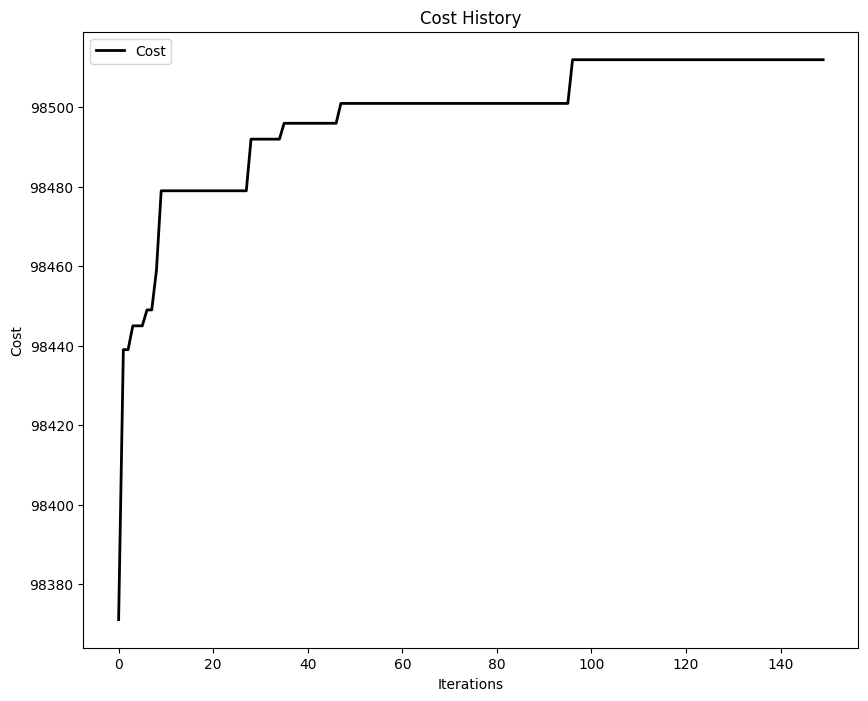

In [12]:
resultPSO.SaveResult(result)